In [126]:
#!pip install statsbombpy
#!pip install mplsoccer
#!pip install highlight_text

In [1]:
from statsbombpy import sb
import pandas as pd
from mplsoccer import VerticalPitch,Pitch
from highlight_text import ax_text, fig_text
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np

C:\Users\William\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Información: 

En esta prueba de concepto, se serializará un análisis datos, con el objetivo de poder brindar indormacion de calidad para la toma de desiciones de los entrenadores.

Para esta prueba se han tomado los datos de la empresa Stats Bomb. Este dataset tiene los datos de los eventos de un montón de competiciones de futbol, tanto de europa como fuera, pero fuero tomados los eventos de el partido de España vs Marruecos en el mundial del 2022.

Las visualizaciones y analisis realizados son los siguientes:
- Pases completos de los jugadores
- Pases incompletos de los jugadores
- Efectividad de pases de los jugadores
- Efectividad de pases de los equipos
- Porcentaje de posesión del balón de los jugadores
- Porcentaje de posesión del balón de los equipos

In [2]:
#Obtencion de los datos de de StatsBombs

free_comps = sb.competitions()
free_comps

competition_id  season_id   country_name    competition_name  \
0                9         27        Germany       1. Bundesliga   
1               16          4         Europe    Champions League   
2               16          1         Europe    Champions League   
3               16          2         Europe    Champions League   
4               16         27         Europe    Champions League   
..             ...        ...            ...                 ...   
62              55         43         Europe           UEFA Euro   
63              35         75         Europe  UEFA Europa League   
64              53        106         Europe   UEFA Women's Euro   
65              72        107  International   Women's World Cup   
66              72         30  International   Women's World Cup   

   competition_gender  competition_youth  competition_international  \
0                male              False                      False   
1                male              False                      False   
2                male              False                      False   
3                male              False                      False   
4                male              False                      False   
..                ...                ...                        ...   
62               male              False                       True   
63               male              False                      False   
64             female              False                       True   
65             female              False                       True   
66             female              False                       True   

   season_name               match_updated           match_updated_360  \
0    2015/2016  2023-08-17T23:51:11.837478                        None   
1    2018/2019  2023-03-07T12:20:48.118250     2021-06-13T16:17:31.694   
2    2017/2018  2021-08-27T11:26:39.802832     2021-06-13T16:17:31.694   
3    2016/2017  2021-08-27T11:26:39.802832     2021-06-13T16:17:31.694   
4    2015/2016  2021-08-27T11:26:39.802832     2021-06-13T16:17:31.694   
..         ...                         ...                         ...   
62        2020  2023-02-24T21:26:47.128979  2023-04-27T22:38:34.970148   
63   1988/1989  2023-06-18T19:28:39.443883     2021-06-13T16:17:31.694   
64        2022  2023-07-17T21:19:03.032991  2023-07-17T21:21:56.497106   
65        2023  2023-09-01T12:34:19.705316  2023-09-01T12:35:45.762196   
66        2019  2023-07-27T10:33:48.273734     2021-06-13T16:17:31.694   

           match_available_360             match_available  
0                         None  2023-08-17T23:51:11.837478  
1                         None  2023-03-07T12:20:48.118250  
2                         None  2021-01-23T21:55:30.425330  
3                         None            2020-07-29T05:00  
4                         None            2020-07-29T05:00  
..                         ...                         ...  
62  2023-04-27T22:38:34.970148  2023-02-24T21:26:47.128979  
63                        None  2023-06-18T19:28:39.443883  
64  2023-07-17T21:21:56.497106  2023-07-17T21:19:03.032991  
65  2023-09-01T12:35:45.762196  2023-09-01T12:34:19.705316  
66                        None  2023-07-27T10:33:48.273734  

[67 rows x 12 columns]

Visualizamos las competiciones y temporadas de interes.

En este caso nos enfocaremos en el mundial del 2023.

In [3]:
#Partidos de la competicion seleccionada usando los ID de competicion y la temporada

mundial_2022 = sb.matches(competition_id=43, season_id=106)
mundial_2022

match_id  match_date      kick_off                     competition season  \
0    3857256  2022-12-02  21:00:00.000  International - FIFA World Cup   2022   
1    3869151  2022-12-03  21:00:00.000  International - FIFA World Cup   2022   
2    3857257  2022-11-30  17:00:00.000  International - FIFA World Cup   2022   
3    3857258  2022-11-24  21:00:00.000  International - FIFA World Cup   2022   
4    3857288  2022-11-26  12:00:00.000  International - FIFA World Cup   2022   
..       ...         ...           ...                             ...    ...   
59   3857265  2022-11-22  18:00:00.000  International - FIFA World Cup   2022   
60   3857262  2022-12-02  17:00:00.000  International - FIFA World Cup   2022   
61   3857261  2022-11-29  21:00:00.000  International - FIFA World Cup   2022   
62   3857255  2022-12-01  21:00:00.000  International - FIFA World Cup   2022   
63   3857254  2022-11-22  15:00:00.000  International - FIFA World Cup   2022   

      home_team    away_team  home_score  away_score match_status  ...  \
0        Serbia  Switzerland           2           3    available  ...   
1     Argentina    Australia           2           1    available  ...   
2     Australia      Denmark           1           0    available  ...   
3        Brazil       Serbia           2           0    available  ...   
4       Tunisia    Australia           0           1    available  ...   
..          ...          ...         ...         ...          ...  ...   
59       Mexico       Poland           0           0    available  ...   
60  South Korea     Portugal           2           1    available  ...   
61        Wales      England           0           3    available  ...   
62        Japan        Spain           2           1    available  ...   
63      Denmark      Tunisia           0           0    available  ...   

              last_updated_360 match_week competition_stage  \
0   2023-04-26T23:49:58.956186          3       Group Stage   
1   2023-07-30T07:48:51.865595          4       Round of 16   
2   2023-06-20T11:04:37.638969          3       Group Stage   
3   2023-07-11T14:56:31.096588          1       Group Stage   
4   2023-04-27T00:30:07.835815          2       Group Stage   
..                         ...        ...               ...   
59  2023-04-27T00:49:30.005344          1       Group Stage   
60  2023-04-26T23:48:08.999798          3       Group Stage   
61  2023-04-27T00:02:44.241621          3       Group Stage   
62  2023-04-26T23:51:48.352990          3       Group Stage   
63  2023-07-29T19:44:56.738444          1       Group Stage   

                                 stadium                         referee  \
0                            Stadium 974       Fernando Andrés Rapallini   
1                  Ahmad bin Ali Stadium                Szymon Marciniak   
2                   Al Janoub Stadium                   Mustapha Ghorbal   
3                         Lusail Stadium                 Alireza Faghani   
4                   Al Janoub Stadium                     Daniel Siebert   
..                                   ...                             ...   
59                           Stadium 974                     Chris Beath   
60               Education City Stadium           Facundo Tello Figueroa   
61                 Ahmad bin Ali Stadium                   Slavko Vinčić   
62  Sheikh Khalifa International Stadium  Victor Miguel de Freitas Gomes   
63               Education City Stadium    César Arturo Ramos Palazuelos   

               home_managers                              away_managers  \
0           Dragan Stojković                                Murat Yakin   
1   Lionel Sebastián Scaloni                        Graham James Arnold   
2        Graham James Arnold                            Kasper Hjulmand   
3      Telê Santana da Silva                           Dragan Stojković   
4                Jalel Kadri                        Graham James Arnold   
..                    

Definiremos variables, para simplemente definir el nombre del país que queremos ver y no realizar tantos cambios:

In [4]:
Team1 = 'Spain'
Team2 = 'Morocco'
MatchId = 3869220

In [5]:
#Filtramos a solo los partidos que nos interesan 
partidos_team1 = mundial_2022.loc[(mundial_2022['home_team'] == Team1)|(mundial_2022['away_team'] == Team1)]
partidos_team1

match_id  match_date      kick_off                     competition season  \
23   3869220  2022-12-06  17:00:00.000  International - FIFA World Cup   2022   
29   3857263  2022-11-27  21:00:00.000  International - FIFA World Cup   2022   
44   3857291  2022-11-23  18:00:00.000  International - FIFA World Cup   2022   
62   3857255  2022-12-01  21:00:00.000  International - FIFA World Cup   2022   

   home_team   away_team  home_score  away_score match_status  ...  \
23   Morocco       Spain           0           0    available  ...   
29     Spain     Germany           1           1    available  ...   
44     Spain  Costa Rica           7           0    available  ...   
62     Japan       Spain           2           1    available  ...   

              last_updated_360 match_week competition_stage  \
23  2023-06-21T20:09:37.051885          4       Round of 16   
29  2023-06-19T15:12:12.978074          2       Group Stage   
44  2023-04-27T00:39:03.690954          1       Group Stage   
62  2023-04-26T23:51:48.352990          3       Group Stage   

                                 stadium                         referee  \
23               Education City Stadium        Fernando Andrés Rapallini   
29                       Al Bayt Stadium          Danny Desmond Makkelie   
44                    Al Thumama Stadium                             NaN   
62  Sheikh Khalifa International Stadium  Victor Miguel de Freitas Gomes   

                   home_managers                 away_managers data_version  \
23               Hoalid Regragui  Luis Enrique Martínez García        1.1.0   
29  Luis Enrique Martínez García             Hans-Dieter Flick        1.1.0   
44  Luis Enrique Martínez García   Luis Fernando Suárez Guzman        1.1.0   
62               Hajime Moriyasu  Luis Enrique Martínez García        1.1.0   

   shot_fidelity_version xy_fidelity_version  
23                     2                   2  
29                     2                   2  
44                     2                   2  
62                     2                   2  

[4 rows x 22 columns]

### Análisis Exploratorio:

In [6]:
# Configuración para visualizar todas las columnas de dataset
pd.options.display.max_columns = None

In [7]:
# Eventos de un partido en especifico utilizando el ID del partido deseado
team1_team2 = sb.events(match_id= MatchId)
team1_team2

ball_receipt_outcome ball_recovery_recovery_failure block_deflection  \
0                     NaN                            NaN              NaN   
1                     NaN                            NaN              NaN   
2                     NaN                            NaN              NaN   
3                     NaN                            NaN              NaN   
4                     NaN                            NaN              NaN   
...                   ...                            ...              ...   
4745                  NaN                            NaN              NaN   
4746                  NaN                            NaN              NaN   
4747                  NaN                            NaN              NaN   
4748                  NaN                            NaN              NaN   
4749                  NaN                            NaN              NaN   

     carry_end_location clearance_aerial_won clearance_body_part  \
0                   NaN                  NaN                 NaN   
1                   NaN                  NaN                 NaN   
2                   NaN                  NaN                 NaN   
3                   NaN                  NaN                 NaN   
4                   NaN                  NaN                 NaN   
...                 ...                  ...                 ...   
4745                NaN                  NaN                 NaN   
4746                NaN                  NaN                 NaN   
4747                NaN                  NaN                 NaN   
4748                NaN                  NaN                 NaN   
4749                NaN                  NaN                 NaN   

     clearance_head clearance_left_foot clearance_right_foot counterpress  \
0               NaN                 NaN                  NaN          NaN   
1               NaN                 NaN                  NaN          NaN   
2               NaN                 NaN                  NaN          NaN   
3               NaN                 NaN                  NaN          NaN   
4               NaN                 NaN                  NaN          NaN   
...             ...                 ...                  ...          ...   
4745            NaN                 NaN                  NaN          NaN   
4746            NaN                 NaN                  NaN          NaN   
4747            NaN                 NaN                  NaN          NaN   
4748            NaN                 NaN                  NaN          NaN   
4749            NaN                 NaN                  NaN          NaN   

     dribble_nutmeg dribble_outcome dribble_overrun duel_outcome duel_type  \
0               NaN             NaN             NaN          NaN       NaN   
1               NaN             NaN             NaN          NaN       NaN   
2               NaN             NaN             NaN          NaN       NaN   
3               NaN             NaN             NaN          NaN       NaN   
4               NaN             NaN             NaN          NaN       NaN   
...             ...             ...             ...          ...       ...   
4745            NaN             NaN             NaN          NaN       NaN   
4746            NaN             NaN             NaN          NaN       NaN   
4747            NaN             NaN             NaN          NaN       NaN   
4748            NaN             NaN             NaN          NaN       NaN   
4749            NaN             NaN             NaN          NaN       NaN   

      duration foul_committed_advantage foul_committed_card  \
0          0.0                      NaN                 NaN   
1          0.0                      NaN                 NaN   
2          0.0                      NaN                 NaN   
3          0.0                      NaN                 NaN   
4          0.0                      NaN                 NaN   
...        ...         

In [8]:
#Visualización de todas las columnas
team1_team2.columns

Index(['ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_deflection', 'carry_end_location', 'clearance_aerial_won',
       'clearance_body_part', 'clearance_head', 'clearance_left_foot',
       'clearance_right_foot', 'counterpress', 'dribble_nutmeg',
       'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_offensive', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_punched_out',
       'goalkeeper_shot_saved_off_target', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'injury_stoppage_in_chain',
       'interception_outcome', 'location', 'match_id', 'minute',
       'miscontrol_aerial_won', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_c

In [9]:
#Filtramos por la columna type el tipo de evento que queremos, que es el de Pases

team1_team2['type'].unique()


array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Foul Committed', 'Foul Won', 'Interception',
       'Ball Recovery', 'Miscontrol', 'Clearance', 'Dribbled Past',
       'Dribble', 'Dispossessed', 'Duel', 'Shot', 'Goal Keeper', 'Block',
       'Injury Stoppage', 'Referee Ball-Drop', 'Tactical Shift', 'Shield',
       'Half End', 'Substitution', 'Player Off', 'Player On'],
      dtype=object)

In [10]:
pases = team1_team2[team1_team2['type']=='Pass']
pases

ball_receipt_outcome ball_recovery_recovery_failure block_deflection  \
12                    NaN                            NaN              NaN   
13                    NaN                            NaN              NaN   
14                    NaN                            NaN              NaN   
15                    NaN                            NaN              NaN   
16                    NaN                            NaN              NaN   
...                   ...                            ...              ...   
1440                  NaN                            NaN              NaN   
1441                  NaN                            NaN              NaN   
1442                  NaN                            NaN              NaN   
1443                  NaN                            NaN              NaN   
1444                  NaN                            NaN              NaN   

     carry_end_location clearance_aerial_won clearance_body_part  \
12                  NaN                  NaN                 NaN   
13                  NaN                  NaN                 NaN   
14                  NaN                  NaN                 NaN   
15                  NaN                  NaN                 NaN   
16                  NaN                  NaN                 NaN   
...                 ...                  ...                 ...   
1440                NaN                  NaN                 NaN   
1441                NaN                  NaN                 NaN   
1442                NaN                  NaN                 NaN   
1443                NaN                  NaN                 NaN   
1444                NaN                  NaN                 NaN   

     clearance_head clearance_left_foot clearance_right_foot counterpress  \
12              NaN                 NaN                  NaN          NaN   
13              NaN                 NaN                  NaN          NaN   
14              NaN                 NaN                  NaN          NaN   
15              NaN                 NaN                  NaN          NaN   
16              NaN                 NaN                  NaN          NaN   
...             ...                 ...                  ...          ...   
1440            NaN                 NaN                  NaN          NaN   
1441            NaN                 NaN                  NaN          NaN   
1442            NaN                 NaN                  NaN          NaN   
1443            NaN                 NaN                  NaN          NaN   
1444            NaN                 NaN                  NaN          NaN   

     dribble_nutmeg dribble_outcome dribble_overrun duel_outcome duel_type  \
12              NaN             NaN             NaN          NaN       NaN   
13              NaN             NaN             NaN          NaN       NaN   
14              NaN             NaN             NaN          NaN       NaN   
15              NaN             NaN             NaN          NaN       NaN   
16              NaN             NaN             NaN          NaN       NaN   
...             ...             ...             ...          ...       ...   
1440            NaN             NaN             NaN          NaN       NaN   
1441            NaN             NaN             NaN          NaN       NaN   
1442            NaN             NaN             NaN          NaN       NaN   
1443            NaN             NaN             NaN          NaN       NaN   
1444            NaN             NaN             NaN          NaN       NaN   

      duration foul_committed_advantage foul_committed_card  \
12    1.599705                      NaN                 NaN   
13    1.594008                      NaN                 NaN   
14    3.270824                      NaN                 NaN   
15    0.960983                      NaN                 NaN   
16    0.709157                      NaN                 NaN   
...        ...         

### Preprocesamiento:

#### El dataset se encuentra muy bien procesado por lo que no hay que hacer mucho cambio para realizar el análisis de los datos.

- La columna del resultado se presenta como NaN cuando el pase es completado, estaremos agregándole la descripción de "Complete".

In [11]:
#Cuando el campo de pass_outcome sea NaN lo sustituiremos por "Complete", a modo descriptivo 
team1_team2['pass_outcome'].fillna('Complete', inplace=True)
team1_team2


ball_receipt_outcome ball_recovery_recovery_failure block_deflection  \
0                     NaN                            NaN              NaN   
1                     NaN                            NaN              NaN   
2                     NaN                            NaN              NaN   
3                     NaN                            NaN              NaN   
4                     NaN                            NaN              NaN   
...                   ...                            ...              ...   
4745                  NaN                            NaN              NaN   
4746                  NaN                            NaN              NaN   
4747                  NaN                            NaN              NaN   
4748                  NaN                            NaN              NaN   
4749                  NaN                            NaN              NaN   

     carry_end_location clearance_aerial_won clearance_body_part  \
0                   NaN                  NaN                 NaN   
1                   NaN                  NaN                 NaN   
2                   NaN                  NaN                 NaN   
3                   NaN                  NaN                 NaN   
4                   NaN                  NaN                 NaN   
...                 ...                  ...                 ...   
4745                NaN                  NaN                 NaN   
4746                NaN                  NaN                 NaN   
4747                NaN                  NaN                 NaN   
4748                NaN                  NaN                 NaN   
4749                NaN                  NaN                 NaN   

     clearance_head clearance_left_foot clearance_right_foot counterpress  \
0               NaN                 NaN                  NaN          NaN   
1               NaN                 NaN                  NaN          NaN   
2               NaN                 NaN                  NaN          NaN   
3               NaN                 NaN                  NaN          NaN   
4               NaN                 NaN                  NaN          NaN   
...             ...                 ...                  ...          ...   
4745            NaN                 NaN                  NaN          NaN   
4746            NaN                 NaN                  NaN          NaN   
4747            NaN                 NaN                  NaN          NaN   
4748            NaN                 NaN                  NaN          NaN   
4749            NaN                 NaN                  NaN          NaN   

     dribble_nutmeg dribble_outcome dribble_overrun duel_outcome duel_type  \
0               NaN             NaN             NaN          NaN       NaN   
1               NaN             NaN             NaN          NaN       NaN   
2               NaN             NaN             NaN          NaN       NaN   
3               NaN             NaN             NaN          NaN       NaN   
4               NaN             NaN             NaN          NaN       NaN   
...             ...             ...             ...          ...       ...   
4745            NaN             NaN             NaN          NaN       NaN   
4746            NaN             NaN             NaN          NaN       NaN   
4747            NaN             NaN             NaN          NaN       NaN   
4748            NaN             NaN             NaN          NaN       NaN   
4749            NaN             NaN             NaN          NaN       NaN   

      duration foul_committed_advantage foul_committed_card  \
0          0.0                      NaN                 NaN   
1          0.0                      NaN                 NaN   
2          0.0                      NaN                 NaN   
3          0.0                      NaN                 NaN   
4          0.0                      NaN                 NaN   
...        ...         

In [12]:
pases = team1_team2[team1_team2['type']=='Pass']

- La columna de “location” se encuentran las coordenadas de donde se realizó el pase, tanto de X como de Y, lo que para hacer la gráfica debemos dividirla. Lo mismo para la ubicación del fin del pase.

In [13]:
#Podemos revisar como vienen las coordenadas en la misma columna.
pases['location']

12      [60.0, 40.0]
13      [41.6, 33.3]
14      [61.4, 54.1]
15       [89.3, 9.8]
16       [75.6, 4.6]
            ...     
1440    [79.4, 55.3]
1441    [93.3, 43.8]
1442    [92.9, 28.4]
1443    [95.9, 42.3]
1444    [94.8, 17.5]
Name: location, Length: 1433, dtype: object

In [14]:
pases['pass_end_location']

12       [37.3, 29.2]
13       [49.5, 56.8]
14       [94.0, 10.2]
15        [78.3, 6.6]
16       [62.3, 18.8]
            ...      
1440     [86.7, 42.9]
1441     [93.5, 26.0]
1442     [95.9, 42.3]
1443     [97.6, 16.2]
1444    [117.1, 46.1]
Name: pass_end_location, Length: 1433, dtype: object

In [15]:
#Separamos la columna donde se encuentran las coordenadas x,y
#Primero creamos columnas nuevas 'x' & 'y' y las llenamos separando las coordenadas de la columna 'location'
#Segundo, creamos las columnas x & y de las coordenadas donde termina el pase y llenamos separando 'pass_end_location'

 
pases[['x', 'y']] = pases['location'].apply(pd.Series)
pases[['finPase_x', 'finPase_y']] = pases['pass_end_location'].apply(pd.Series)
pases

C:\Users\William\AppData\Local\Temp\ipykernel_3980\1121253449.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pases[['x', 'y']] = pases['location'].apply(pd.Series)
C:\Users\William\AppData\Local\Temp\ipykernel_3980\1121253449.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pases[['x', 'y']] = pases['location'].apply(pd.Series)
C:\Users\William\AppData\Local\Temp\ipykernel_3980\1121253449.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

ball_receipt_outcome ball_recovery_recovery_failure block_deflection  \
12                    NaN                            NaN              NaN   
13                    NaN                            NaN              NaN   
14                    NaN                            NaN              NaN   
15                    NaN                            NaN              NaN   
16                    NaN                            NaN              NaN   
...                   ...                            ...              ...   
1440                  NaN                            NaN              NaN   
1441                  NaN                            NaN              NaN   
1442                  NaN                            NaN              NaN   
1443                  NaN                            NaN              NaN   
1444                  NaN                            NaN              NaN   

     carry_end_location clearance_aerial_won clearance_body_part  \
12                  NaN                  NaN                 NaN   
13                  NaN                  NaN                 NaN   
14                  NaN                  NaN                 NaN   
15                  NaN                  NaN                 NaN   
16                  NaN                  NaN                 NaN   
...                 ...                  ...                 ...   
1440                NaN                  NaN                 NaN   
1441                NaN                  NaN                 NaN   
1442                NaN                  NaN                 NaN   
1443                NaN                  NaN                 NaN   
1444                NaN                  NaN                 NaN   

     clearance_head clearance_left_foot clearance_right_foot counterpress  \
12              NaN                 NaN                  NaN          NaN   
13              NaN                 NaN                  NaN          NaN   
14              NaN                 NaN                  NaN          NaN   
15              NaN                 NaN                  NaN          NaN   
16              NaN                 NaN                  NaN          NaN   
...             ...                 ...                  ...          ...   
1440            NaN                 NaN                  NaN          NaN   
1441            NaN                 NaN                  NaN          NaN   
1442            NaN                 NaN                  NaN          NaN   
1443            NaN                 NaN                  NaN          NaN   
1444            NaN                 NaN                  NaN          NaN   

     dribble_nutmeg dribble_outcome dribble_overrun duel_outcome duel_type  \
12              NaN             NaN             NaN          NaN       NaN   
13              NaN             NaN             NaN          NaN       NaN   
14              NaN             NaN             NaN          NaN       NaN   
15              NaN             NaN             NaN          NaN       NaN   
16              NaN             NaN             NaN          NaN       NaN   
...             ...             ...             ...          ...       ...   
1440            NaN             NaN             NaN          NaN       NaN   
1441            NaN             NaN             NaN          NaN       NaN   
1442            NaN             NaN             NaN          NaN       NaN   
1443            NaN             NaN             NaN          NaN       NaN   
1444            NaN             NaN             NaN          NaN       NaN   

      duration foul_committed_advantage foul_committed_card  \
12    1.599705                      NaN                 NaN   
13    1.594008                      NaN                 NaN   
14    3.270824                      NaN                 NaN   
15    0.960983                      NaN                 NaN   
16    0.709157                      NaN                 NaN   
...        ...         

### Presentacion y análisis de los datos:

#### Se crearán dientes graficas del análisis de los datos realizados. En lo adelante se estarán especificando cada uno:

- #### Efectividad de los pases del balón

In [16]:
# Calcular el número de pases completados por equipo
pases_completados_por_equipo = team1_team2[team1_team2['pass_outcome'] == 'Complete'].groupby('team')['pass_outcome'].count()
pases_completados_por_equipo

team
Morocco    1256
Spain      3271
Name: pass_outcome, dtype: int64

In [17]:
# Calcular el número total de pases por equipo
total_pases_por_equipo = team1_team2.groupby('team')['pass_outcome'].count()
total_pases_por_equipo

team
Morocco    1371
Spain      3379
Name: pass_outcome, dtype: int64

In [18]:
# Calcular el número de pases completados por equipo
pases_completados_por_equipo = team1_team2[team1_team2['pass_outcome'] == 'Complete'].groupby('team')['pass_outcome'].count()
pases_completados_por_equipo

team
Morocco    1256
Spain      3271
Name: pass_outcome, dtype: int64

In [19]:
# Calcular el porcentaje de efectividad por equipo
porcentaje_efectividad_por_equipo = (pases_completados_por_equipo / total_pases_por_equipo) * 100

# Mostrar el resultado
print(porcentaje_efectividad_por_equipo)

team
Morocco    91.611962
Spain      96.803788
Name: pass_outcome, dtype: float64


In [20]:
# Obtenemos los dato para poder presentarlos
equipos = porcentaje_efectividad_por_equipo.index
porcentajes_efectividad = porcentaje_efectividad_por_equipo.values

porcentajes_efectividad

array([91.61196207, 96.8037881 ])

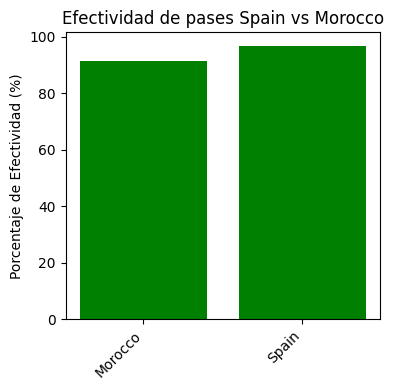

In [21]:
# Crear un arreglo de índices para los equipos
indices = np.arange(len(equipos))

# Definir colores personalizados (verde para efectividad positiva, rojo para efectividad negativa)
colores = ['green' if x >=70  else 'red' for x in porcentajes_efectividad]

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(4, 4))

# Crear las barras para el porcentaje de efectividad
ax.bar(indices, porcentajes_efectividad, color=colores)

# Configurar etiquetas en el eje x
ax.set_xticks(indices)
ax.set_xticklabels(equipos, rotation=45, ha='right')

# Configurar etiquetas y título
plt.ylabel('Porcentaje de Efectividad (%)')
plt.title('Efectividad de pases ' + Team1 + ' vs ' + Team2)

# Mostrar el gráfico
plt.tight_layout()
plt.show()



- Obtenemos los datos del primer equipo, es de quien detallaremos las estadisticas.

In [22]:
#Separando en diferentes tablas los pases de los dos equipo

pases_team1=pases[(pases["team"]== Team1)]
#pases_team2 = team1_team2[(team1_team2["team"]==Team2)]
pases_team1

ball_receipt_outcome ball_recovery_recovery_failure block_deflection  \
12                    NaN                            NaN              NaN   
13                    NaN                            NaN              NaN   
14                    NaN                            NaN              NaN   
15                    NaN                            NaN              NaN   
16                    NaN                            NaN              NaN   
...                   ...                            ...              ...   
1440                  NaN                            NaN              NaN   
1441                  NaN                            NaN              NaN   
1442                  NaN                            NaN              NaN   
1443                  NaN                            NaN              NaN   
1444                  NaN                            NaN              NaN   

     carry_end_location clearance_aerial_won clearance_body_part  \
12                  NaN                  NaN                 NaN   
13                  NaN                  NaN                 NaN   
14                  NaN                  NaN                 NaN   
15                  NaN                  NaN                 NaN   
16                  NaN                  NaN                 NaN   
...                 ...                  ...                 ...   
1440                NaN                  NaN                 NaN   
1441                NaN                  NaN                 NaN   
1442                NaN                  NaN                 NaN   
1443                NaN                  NaN                 NaN   
1444                NaN                  NaN                 NaN   

     clearance_head clearance_left_foot clearance_right_foot counterpress  \
12              NaN                 NaN                  NaN          NaN   
13              NaN                 NaN                  NaN          NaN   
14              NaN                 NaN                  NaN          NaN   
15              NaN                 NaN                  NaN          NaN   
16              NaN                 NaN                  NaN          NaN   
...             ...                 ...                  ...          ...   
1440            NaN                 NaN                  NaN          NaN   
1441            NaN                 NaN                  NaN          NaN   
1442            NaN                 NaN                  NaN          NaN   
1443            NaN                 NaN                  NaN          NaN   
1444            NaN                 NaN                  NaN          NaN   

     dribble_nutmeg dribble_outcome dribble_overrun duel_outcome duel_type  \
12              NaN             NaN             NaN          NaN       NaN   
13              NaN             NaN             NaN          NaN       NaN   
14              NaN             NaN             NaN          NaN       NaN   
15              NaN             NaN             NaN          NaN       NaN   
16              NaN             NaN             NaN          NaN       NaN   
...             ...             ...             ...          ...       ...   
1440            NaN             NaN             NaN          NaN       NaN   
1441            NaN             NaN             NaN          NaN       NaN   
1442            NaN             NaN             NaN          NaN       NaN   
1443            NaN             NaN             NaN          NaN       NaN   
1444            NaN             NaN             NaN          NaN       NaN   

      duration foul_committed_advantage foul_committed_card  \
12    1.599705                      NaN                 NaN   
13    1.594008                      NaN                 NaN   
14    3.270824                      NaN                 NaN   
15    0.960983                      NaN                 NaN   
16    0.709157                      NaN                 NaN   
...        ...         

In [23]:
#Contamos los pases totales por jugador 
pases_totales = pases_team1.groupby(['player'])['player'].count().to_frame()

pases_totales

player
player                            
Alejandro Balde Martínez        15
Anssumane Fati                   8
Aymeric Laporte                180
Carlos Soler Barragán           40
Daniel Olmo Carvajal            37
Ferrán Torres García            24
Jordi Alba Ramos               114
Marco Asensio Willemsen         14
Marcos Llorente Moreno         104
Nicholas Williams Arthuer       19
Pablo Martín Páez Gavira        23
Pablo Sarabia García             5
Pedro González López           147
Rodrigo Hernández Cascante     220
Sergio Busquets i Burgos        76
Unai Simón Mendibil             34
Álvaro Borja Morata Martín       8

In [24]:
#Visualizamos los posibles resultados de pass_outcome
pases_team1['pass_outcome'].unique()


array(['Complete', 'Incomplete', 'Pass Offside', 'Out', 'Unknown'],
      dtype=object)

In [25]:
pases_team1

ball_receipt_outcome ball_recovery_recovery_failure block_deflection  \
12                    NaN                            NaN              NaN   
13                    NaN                            NaN              NaN   
14                    NaN                            NaN              NaN   
15                    NaN                            NaN              NaN   
16                    NaN                            NaN              NaN   
...                   ...                            ...              ...   
1440                  NaN                            NaN              NaN   
1441                  NaN                            NaN              NaN   
1442                  NaN                            NaN              NaN   
1443                  NaN                            NaN              NaN   
1444                  NaN                            NaN              NaN   

     carry_end_location clearance_aerial_won clearance_body_part  \
12                  NaN                  NaN                 NaN   
13                  NaN                  NaN                 NaN   
14                  NaN                  NaN                 NaN   
15                  NaN                  NaN                 NaN   
16                  NaN                  NaN                 NaN   
...                 ...                  ...                 ...   
1440                NaN                  NaN                 NaN   
1441                NaN                  NaN                 NaN   
1442                NaN                  NaN                 NaN   
1443                NaN                  NaN                 NaN   
1444                NaN                  NaN                 NaN   

     clearance_head clearance_left_foot clearance_right_foot counterpress  \
12              NaN                 NaN                  NaN          NaN   
13              NaN                 NaN                  NaN          NaN   
14              NaN                 NaN                  NaN          NaN   
15              NaN                 NaN                  NaN          NaN   
16              NaN                 NaN                  NaN          NaN   
...             ...                 ...                  ...          ...   
1440            NaN                 NaN                  NaN          NaN   
1441            NaN                 NaN                  NaN          NaN   
1442            NaN                 NaN                  NaN          NaN   
1443            NaN                 NaN                  NaN          NaN   
1444            NaN                 NaN                  NaN          NaN   

     dribble_nutmeg dribble_outcome dribble_overrun duel_outcome duel_type  \
12              NaN             NaN             NaN          NaN       NaN   
13              NaN             NaN             NaN          NaN       NaN   
14              NaN             NaN             NaN          NaN       NaN   
15              NaN             NaN             NaN          NaN       NaN   
16              NaN             NaN             NaN          NaN       NaN   
...             ...             ...             ...          ...       ...   
1440            NaN             NaN             NaN          NaN       NaN   
1441            NaN             NaN             NaN          NaN       NaN   
1442            NaN             NaN             NaN          NaN       NaN   
1443            NaN             NaN             NaN          NaN       NaN   
1444            NaN             NaN             NaN          NaN       NaN   

      duration foul_committed_advantage foul_committed_card  \
12    1.599705                      NaN                 NaN   
13    1.594008                      NaN                 NaN   
14    3.270824                      NaN                 NaN   
15    0.960983                      NaN                 NaN   
16    0.709157                      NaN                 NaN   
...        ...         

In [31]:
#Separamos los pases completos de los incompletos.
completos = pases_team1[pases_team1['pass_outcome'] == 'Complete']
incompletos = pases_team1[pases_team1['pass_outcome'] == 'Incomplete']

completos

ball_receipt_outcome ball_recovery_recovery_failure block_deflection  \
12                    NaN                            NaN              NaN   
13                    NaN                            NaN              NaN   
14                    NaN                            NaN              NaN   
15                    NaN                            NaN              NaN   
16                    NaN                            NaN              NaN   
...                   ...                            ...              ...   
1440                  NaN                            NaN              NaN   
1441                  NaN                            NaN              NaN   
1442                  NaN                            NaN              NaN   
1443                  NaN                            NaN              NaN   
1444                  NaN                            NaN              NaN   

     carry_end_location clearance_aerial_won clearance_body_part  \
12                  NaN                  NaN                 NaN   
13                  NaN                  NaN                 NaN   
14                  NaN                  NaN                 NaN   
15                  NaN                  NaN                 NaN   
16                  NaN                  NaN                 NaN   
...                 ...                  ...                 ...   
1440                NaN                  NaN                 NaN   
1441                NaN                  NaN                 NaN   
1442                NaN                  NaN                 NaN   
1443                NaN                  NaN                 NaN   
1444                NaN                  NaN                 NaN   

     clearance_head clearance_left_foot clearance_right_foot counterpress  \
12              NaN                 NaN                  NaN          NaN   
13              NaN                 NaN                  NaN          NaN   
14              NaN                 NaN                  NaN          NaN   
15              NaN                 NaN                  NaN          NaN   
16              NaN                 NaN                  NaN          NaN   
...             ...                 ...                  ...          ...   
1440            NaN                 NaN                  NaN          NaN   
1441            NaN                 NaN                  NaN          NaN   
1442            NaN                 NaN                  NaN          NaN   
1443            NaN                 NaN                  NaN          NaN   
1444            NaN                 NaN                  NaN          NaN   

     dribble_nutmeg dribble_outcome dribble_overrun duel_outcome duel_type  \
12              NaN             NaN             NaN          NaN       NaN   
13              NaN             NaN             NaN          NaN       NaN   
14              NaN             NaN             NaN          NaN       NaN   
15              NaN             NaN             NaN          NaN       NaN   
16              NaN             NaN             NaN          NaN       NaN   
...             ...             ...             ...          ...       ...   
1440            NaN             NaN             NaN          NaN       NaN   
1441            NaN             NaN             NaN          NaN       NaN   
1442            NaN             NaN             NaN          NaN       NaN   
1443            NaN             NaN             NaN          NaN       NaN   
1444            NaN             NaN             NaN          NaN       NaN   

      duration foul_committed_advantage foul_committed_card  \
12    1.599705                      NaN                 NaN   
13    1.594008                      NaN                 NaN   
14    3.270824                      NaN                 NaN   
15    0.960983                      NaN                 NaN   
16    0.709157                      NaN                 NaN   
...        ...         

In [32]:
#agregando la cuenta de los pases completos e incompletos a nuestra tabla de cuenta de pases
pases_totales['completos'] = completos.groupby(['player'])['player'].count().to_frame()
pases_totales['incompletos'] = incompletos.groupby(['player'])['player'].count().to_frame()
pases_totales = pases_totales.fillna(0)
pases_totales

player  completos  incompletos
player                                                    
Alejandro Balde Martínez        15         14            1
Anssumane Fati                   8          7            1
Aymeric Laporte                180        172            7
Carlos Soler Barragán           40         35            3
Daniel Olmo Carvajal            37         32            4
Ferrán Torres García            24         19            5
Jordi Alba Ramos               114         99           14
Marco Asensio Willemsen         14         11            3
Marcos Llorente Moreno         104         94            9
Nicholas Williams Arthuer       19         15            4
Pablo Martín Páez Gavira        23         18            5
Pablo Sarabia García             5          2            3
Pedro González López           147        135            8
Rodrigo Hernández Cascante     220        204           14
Sergio Busquets i Burgos        76         67            9
Unai Simón Mendibil             34         31            2
Álvaro Borja Morata Martín       8          5            1

In [33]:
#Renombrando columnas y creando una columna de porcentaje de pases completos y creando un minimo de pases
pases_totales = pases_totales.rename(columns={'player' : 'pases totales'})
pases_totales = pases_totales.reset_index()
pases_totales['Porcentaje %'] = pases_totales['completos']/pases_totales['pases totales']*100
pases_totales = pases_totales[pases_totales['pases totales']>=10]
pases_totales

player  pases totales  completos  incompletos  \
0     Alejandro Balde Martínez             15         14            1   
2              Aymeric Laporte            180        172            7   
3        Carlos Soler Barragán             40         35            3   
4         Daniel Olmo Carvajal             37         32            4   
5         Ferrán Torres García             24         19            5   
6             Jordi Alba Ramos            114         99           14   
7      Marco Asensio Willemsen             14         11            3   
8       Marcos Llorente Moreno            104         94            9   
9    Nicholas Williams Arthuer             19         15            4   
10    Pablo Martín Páez Gavira             23         18            5   
12        Pedro González López            147        135            8   
13  Rodrigo Hernández Cascante            220        204           14   
14    Sergio Busquets i Burgos             76         67            9   
15         Unai Simón Mendibil             34         31            2   

    Porcentaje %  
0      93.333333  
2      95.555556  
3      87.500000  
4      86.486486  
5      79.166667  
6      86.842105  
7      78.571429  
8      90.384615  
9      78.947368  
10     78.260870  
12     91.836735  
13     92.727273  
14     88.157895  
15     91.176471

In [35]:
pases_totales['pases totales'].sum()

1047

In [155]:
#Creamos un top 10 de jugadores para hacer la grafica
top_10_porcentaje_efectividad = pases_totales.sort_values('Porcentaje %', ascending = True).tail(10)
top_10_porcentaje_efectividad

player  pases totales  completos  incompletos  \
4         Daniel Olmo Carvajal             37         32            4   
6             Jordi Alba Ramos            114         99           14   
3        Carlos Soler Barragán             40         35            3   
14    Sergio Busquets i Burgos             76         67            9   
8       Marcos Llorente Moreno            104         94            9   
15         Unai Simón Mendibil             34         31            2   
12        Pedro González López            147        135            8   
13  Rodrigo Hernández Cascante            220        204           14   
0     Alejandro Balde Martínez             15         14            1   
2              Aymeric Laporte            180        172            7   

    Porcentaje %  
4      86.486486  
6      86.842105  
3      87.500000  
14     88.157895  
8      90.384615  
15     91.176471  
12     91.836735  
13     92.727273  
0      93.333333  
2      95.555556

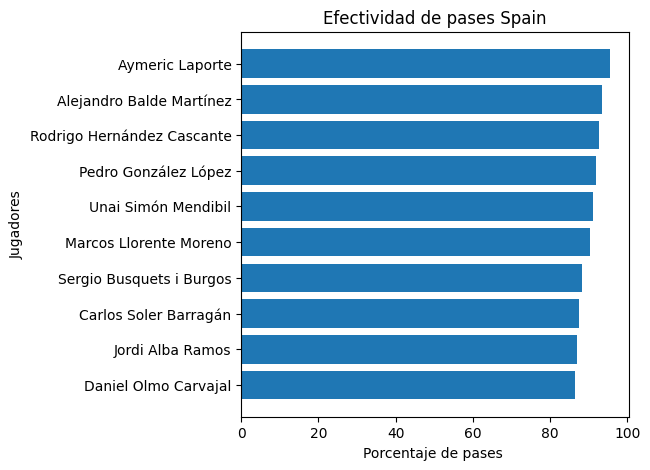

In [156]:
#Graficas de barras para la presentación de los mejores 10
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
ax.barh(top_10_porcentaje_efectividad['player'],
       top_10_porcentaje_efectividad['Porcentaje %'])
plt.title("Efectividad de pases " + Team1)
plt.xlabel("Porcentaje de pases ")
plt.ylabel("Jugadores")
plt.show()

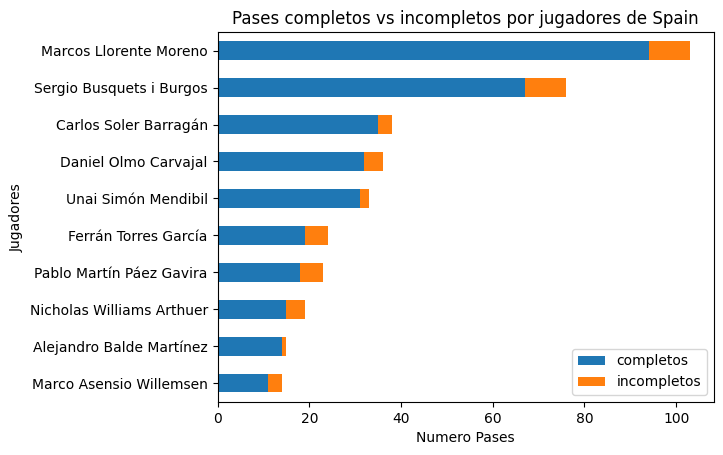

In [157]:
#Graficamos la relacion de los pases compleyado vs los incompletos en un diagrama de barras

ax = pases_totales[['player','completos','incompletos']].sort_values('completos', 
                                 ascending = True).head(10).plot.barh(x='player',stacked=True)
plt.title("Pases completos vs incompletos por jugadores de " + Team1)
plt.xlabel("Numero Pases")
plt.ylabel("Jugadores")
plt.show()

In [158]:
#detalles de los colores de las lineas en el grafico
white="white"
sbred='#e21017'
lightgrey="#d9d9d9"
darkgrey='#9A9A9A'
cmaplist = [white, darkgrey, sbred]
cmap = LinearSegmentedColormap.from_list("", cmaplist)

In [159]:
#Creando una funcion para crear el mapa de calor y de pases

def passMap(player):
    
    player=player
    #Filtrando los pases solo del jugador seleccionado
    comp=completos[(completos["player"]==player)]
    incomp=incompletos[(incompletos["player"]==player)]

    #dibujando el campo de futbol
    pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='black',line_zorder=2)

    fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
    fig.set_facecolor('white')

    #Contando los pases por zona y coordenadas x & y de finalizacion de los pases para el mapa de calor
    bin_statistic = pitch.bin_statistic(comp.finPase_x, comp.finPase_y, statistic='count', bins=(12, 8), normalize=True)
    pitch.heatmap(bin_statistic, ax=ax, alpha=0.5, cmap=cmap)

    #Graficando las flechas de los pases de Messi
    pitch.arrows(comp.x, comp.y,
    comp.finPase_x, comp.finPase_y, width=3,
    headwidth=8, headlength=5, color=sbred, ax=ax, zorder=2, label = "Pase completado")
    pitch.arrows(incomp.x, incomp.y,
    incomp.finPase_x, incomp.finPase_y, width=3,
    headwidth=8, headlength=5, color=darkgrey, ax=ax, zorder=2, label = "Pase fallado")

    #etiquetas de color
    ax.legend(facecolor='white', handlelength=5, edgecolor='None', fontsize=20, loc='best')

    #titulo
    ax_title = ax.set_title('Pases de ' f'{player} vs ' + Team2, fontsize=30,color='black')
    
    plt.show()

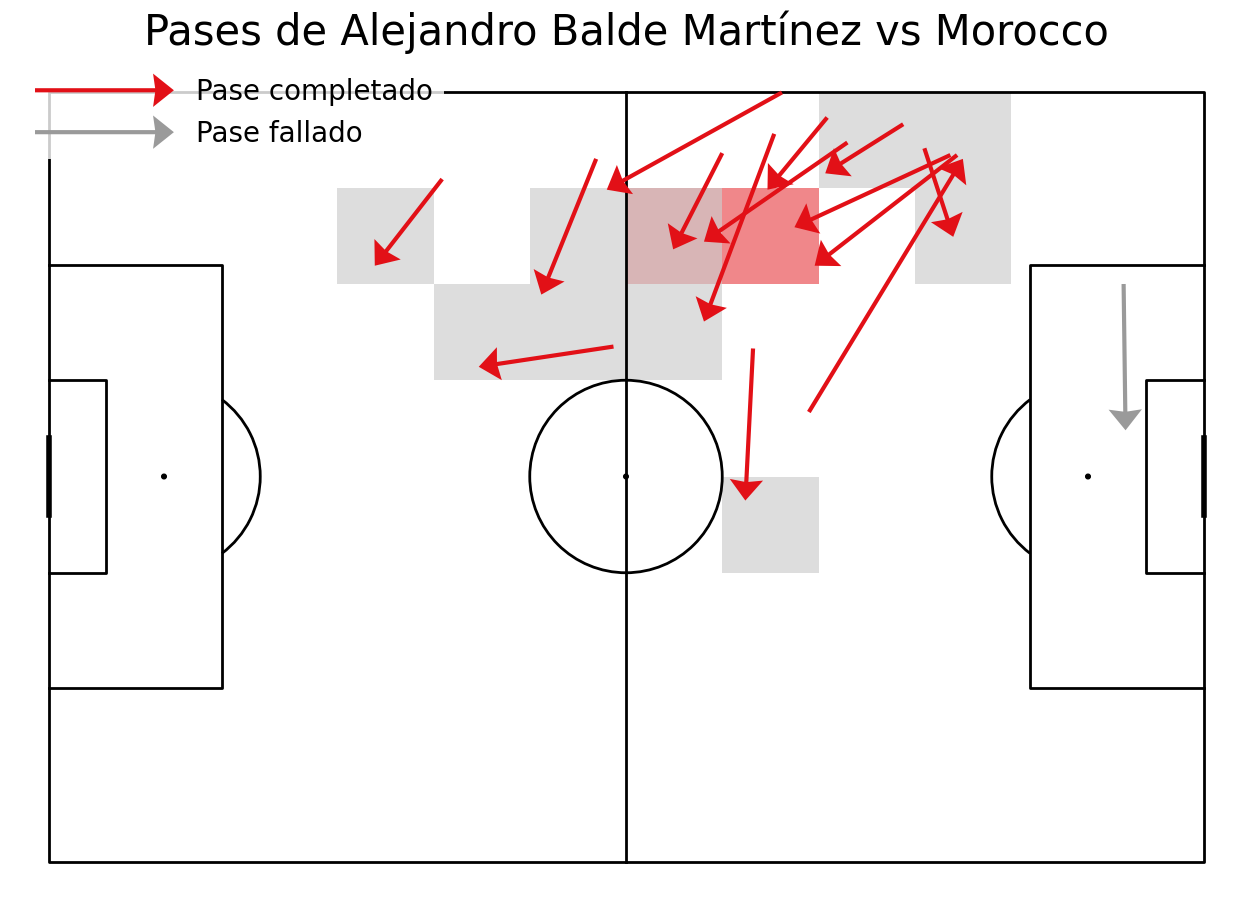

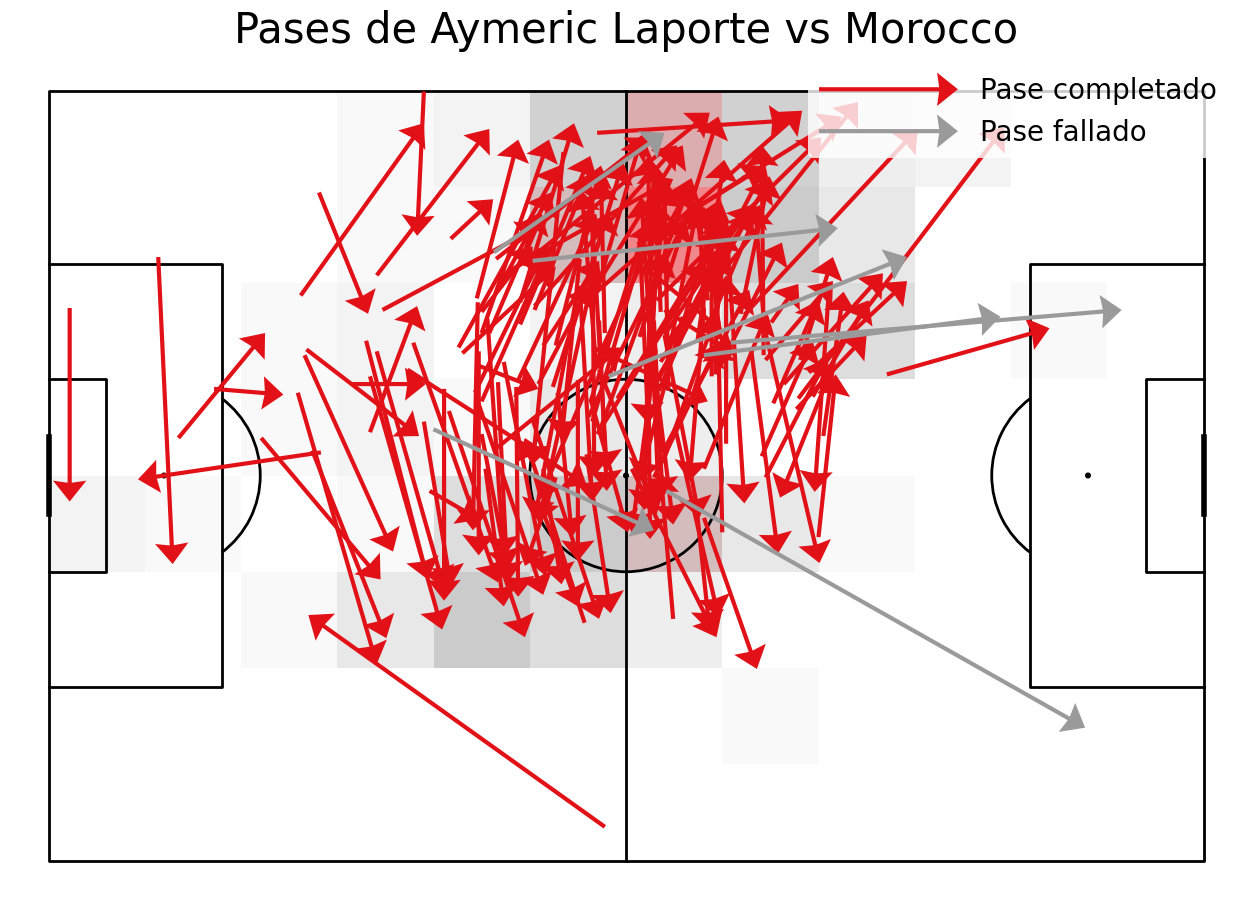

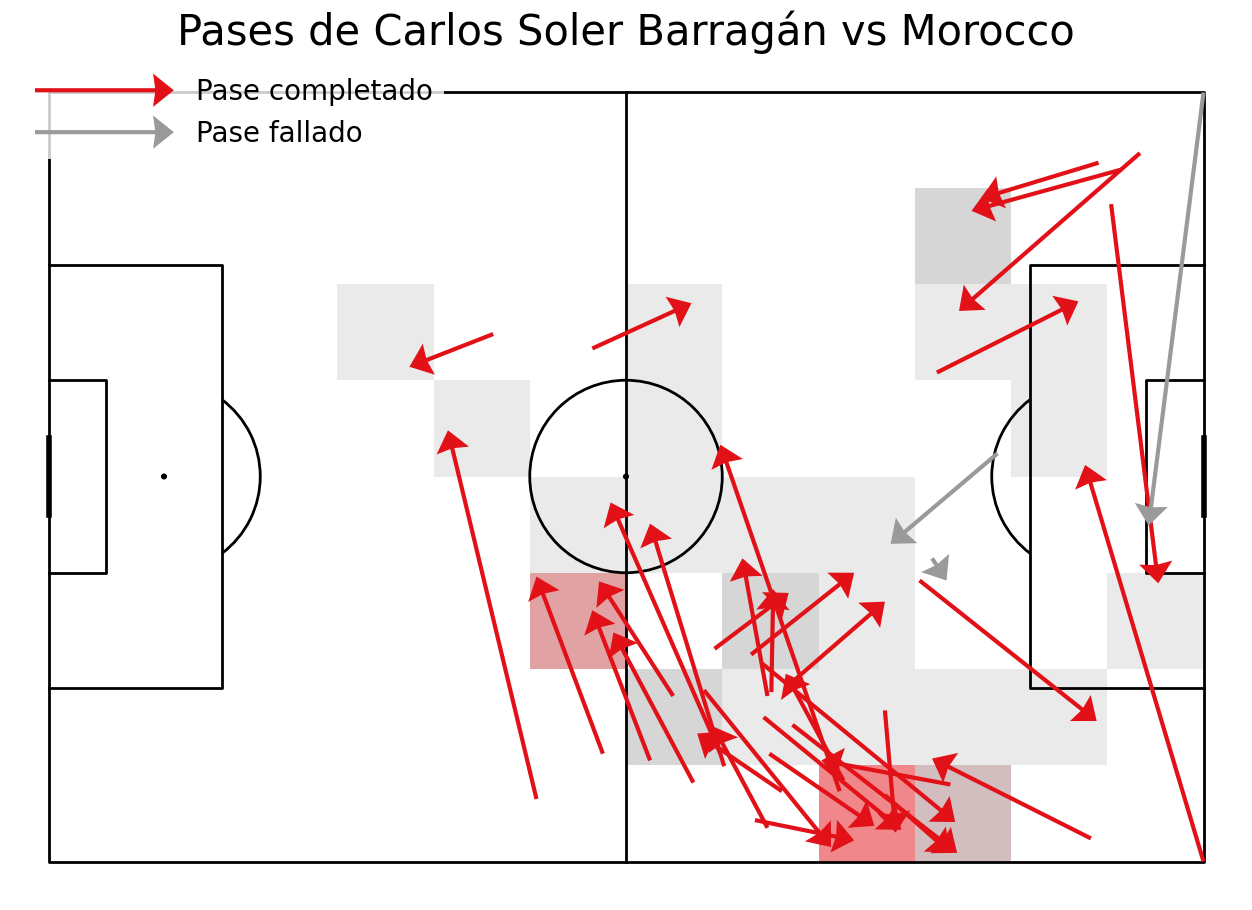

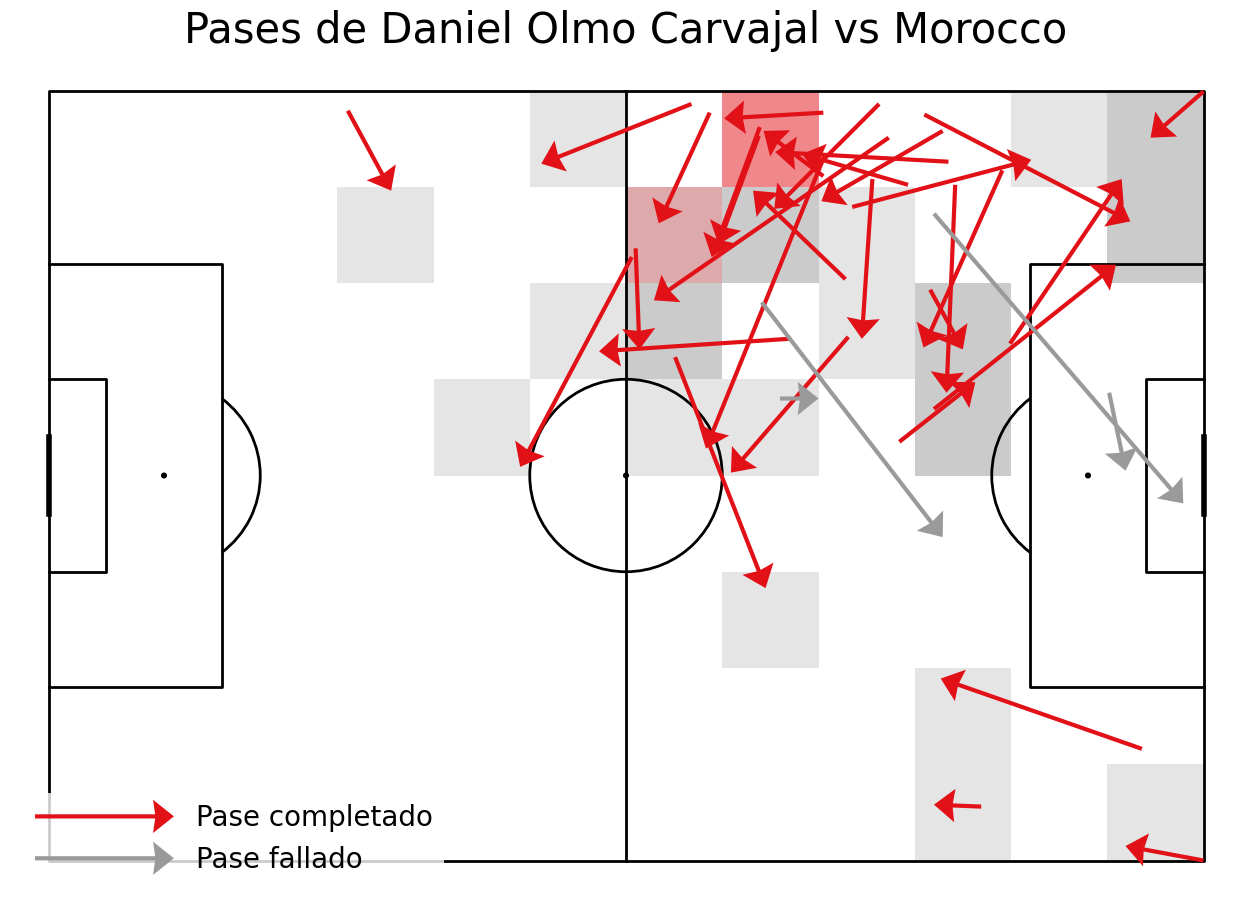

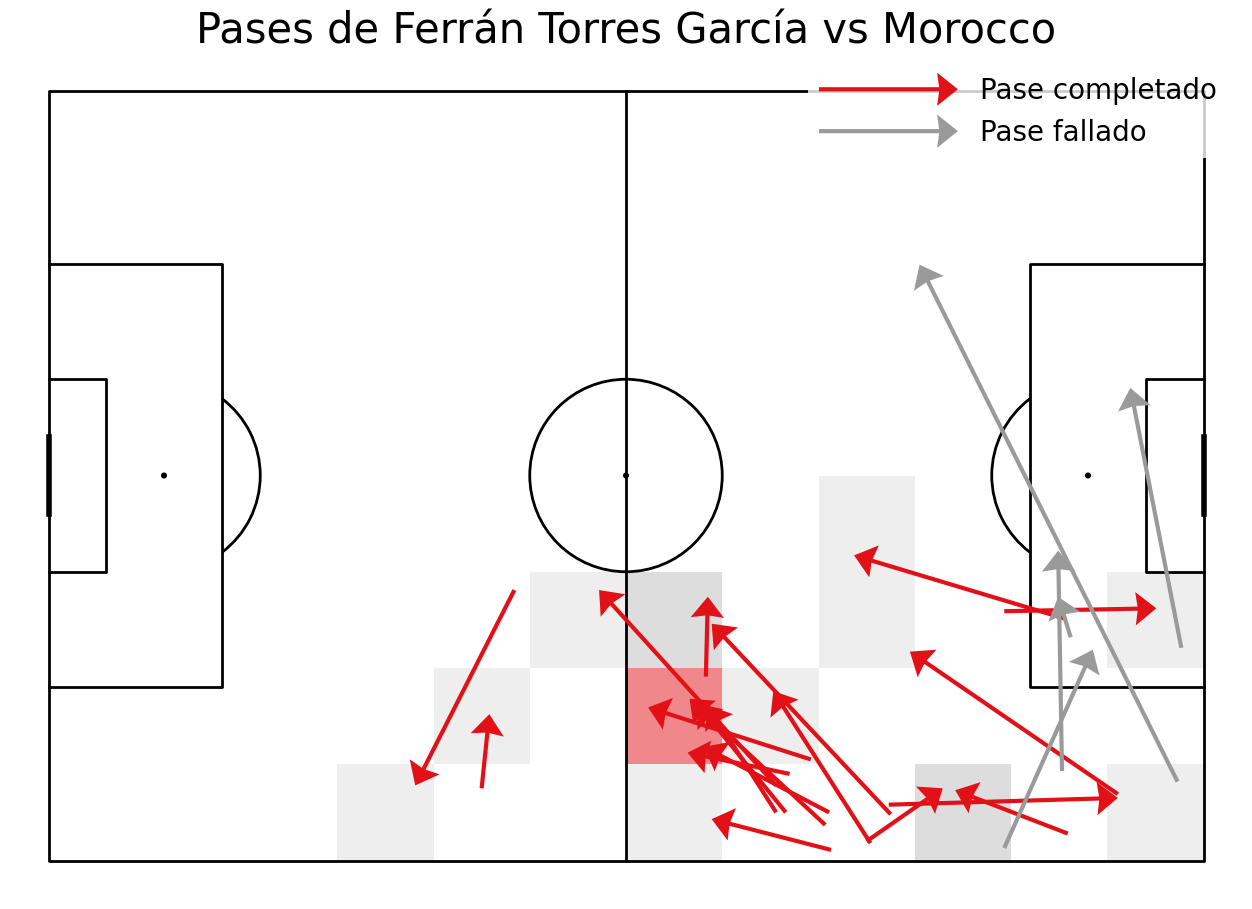

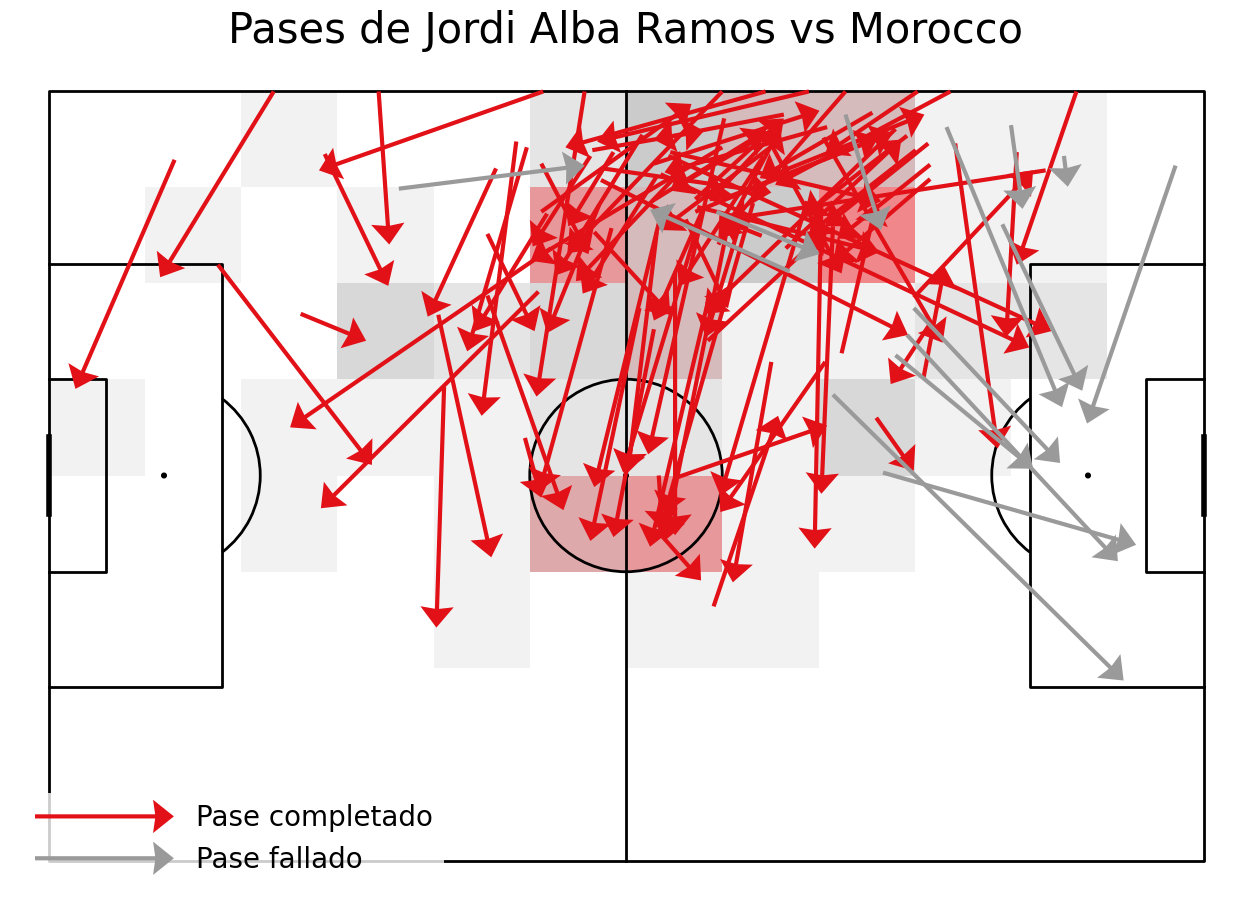

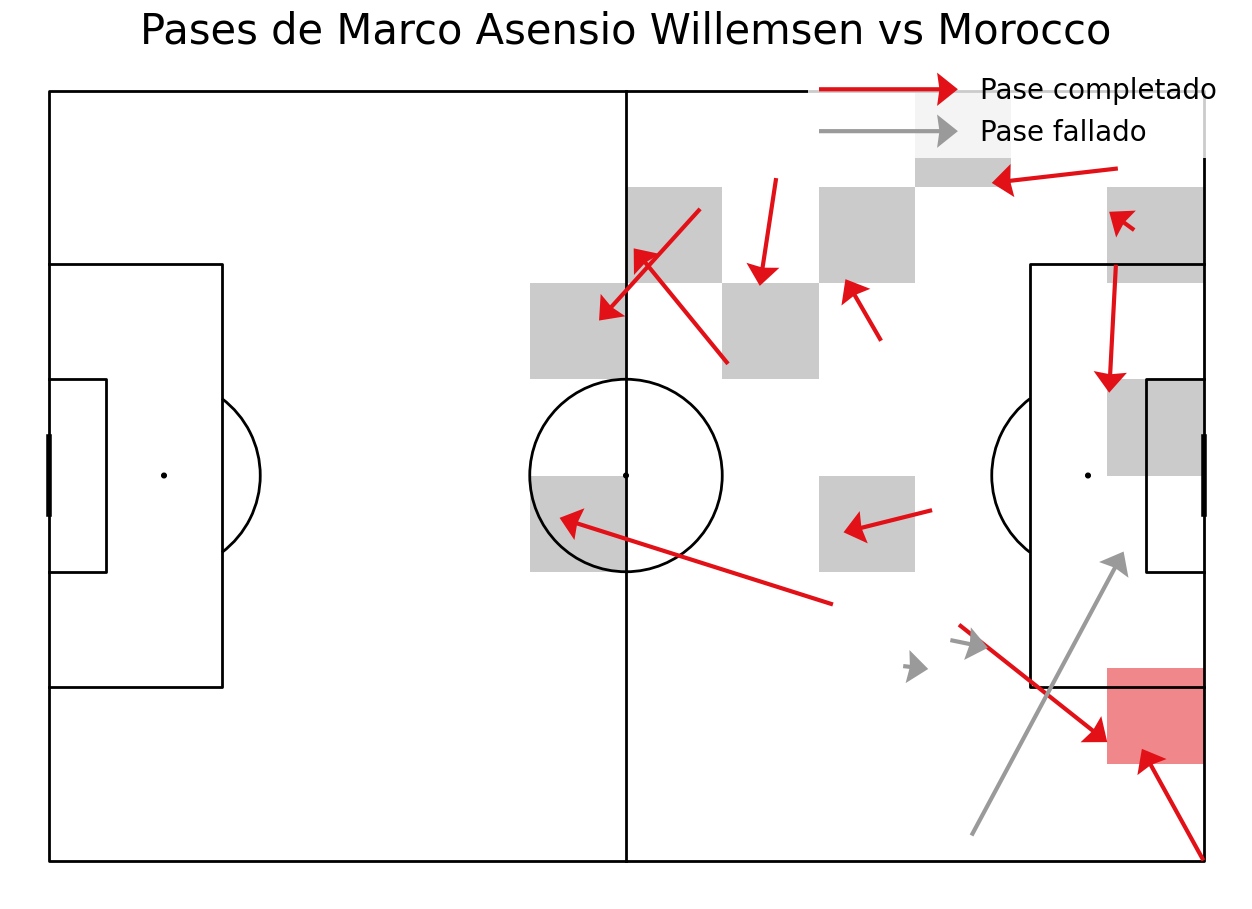

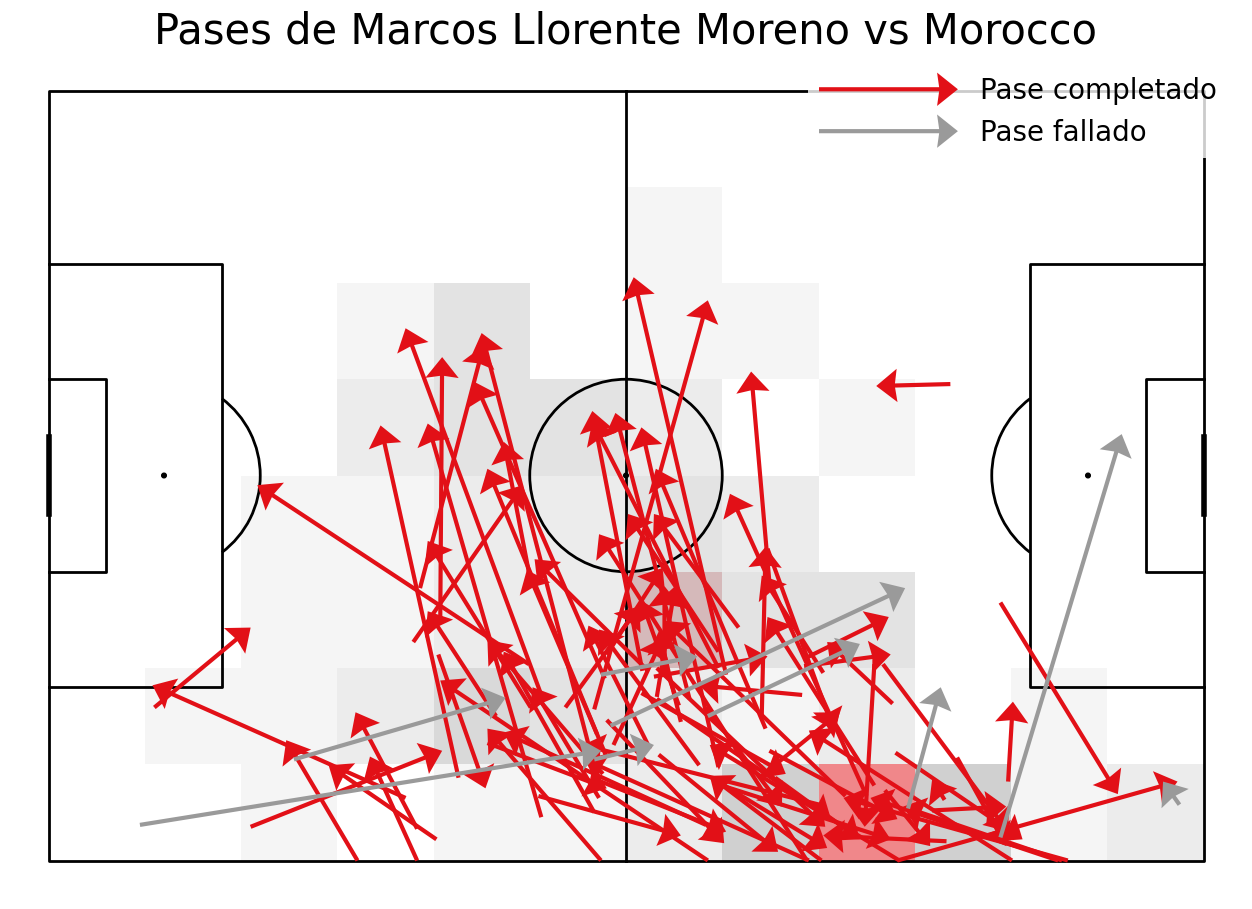

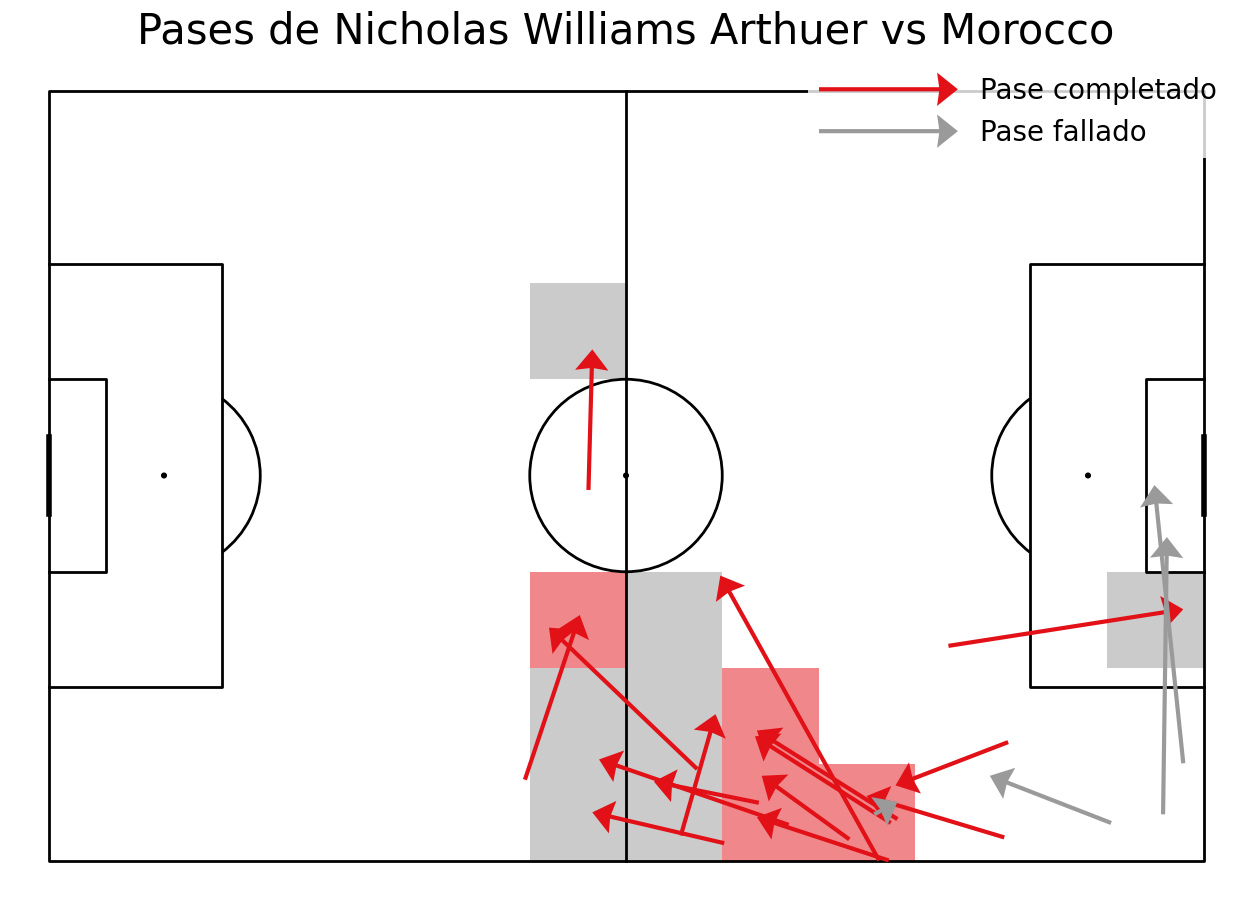

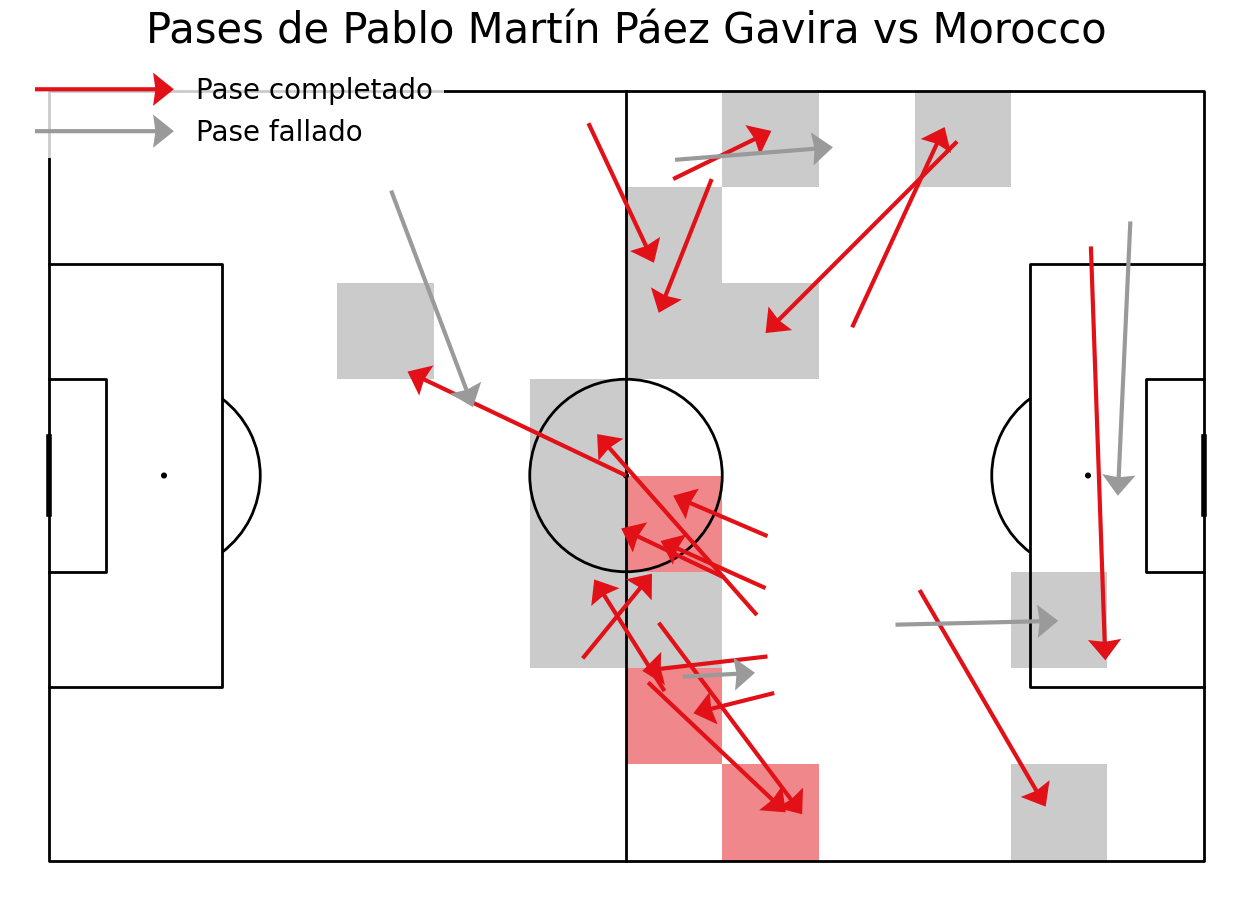

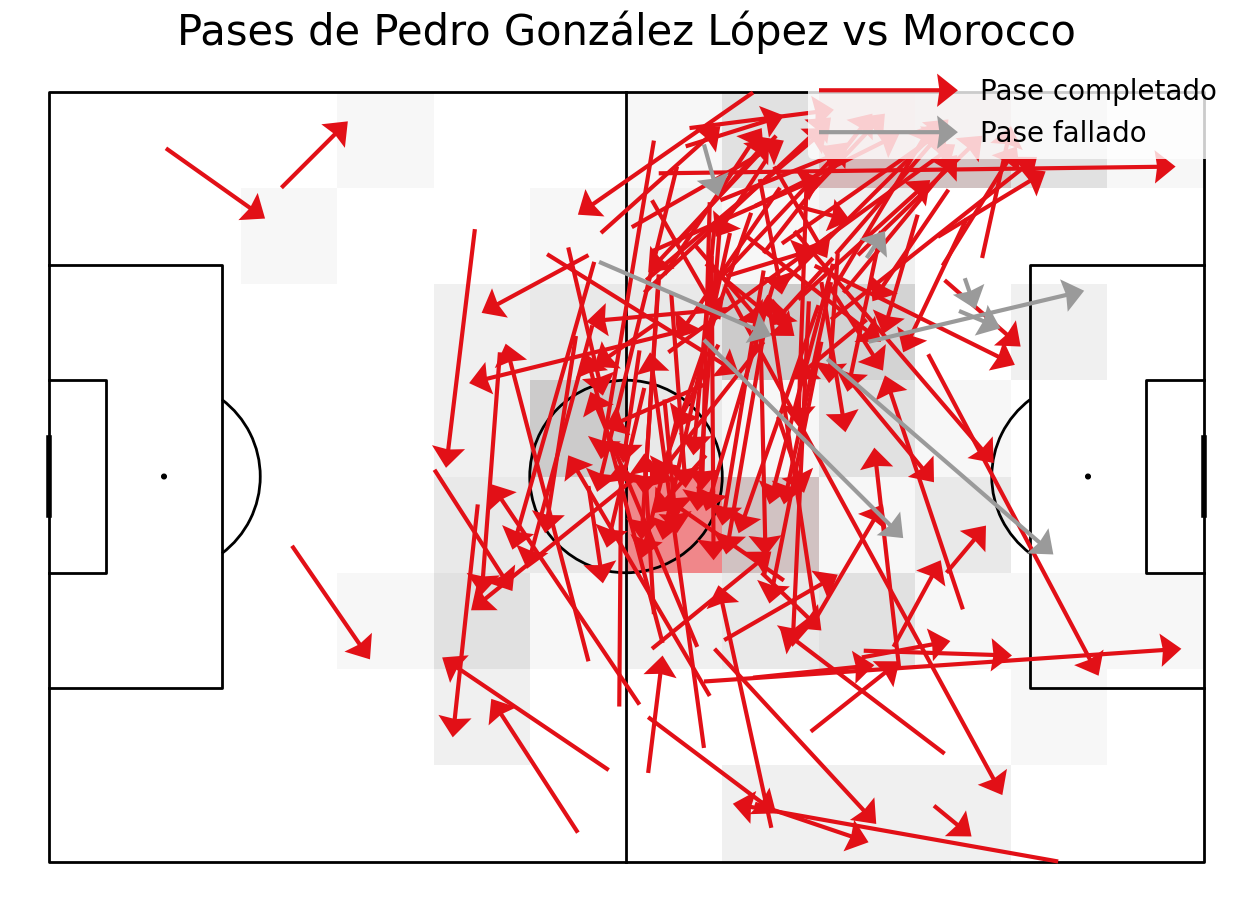

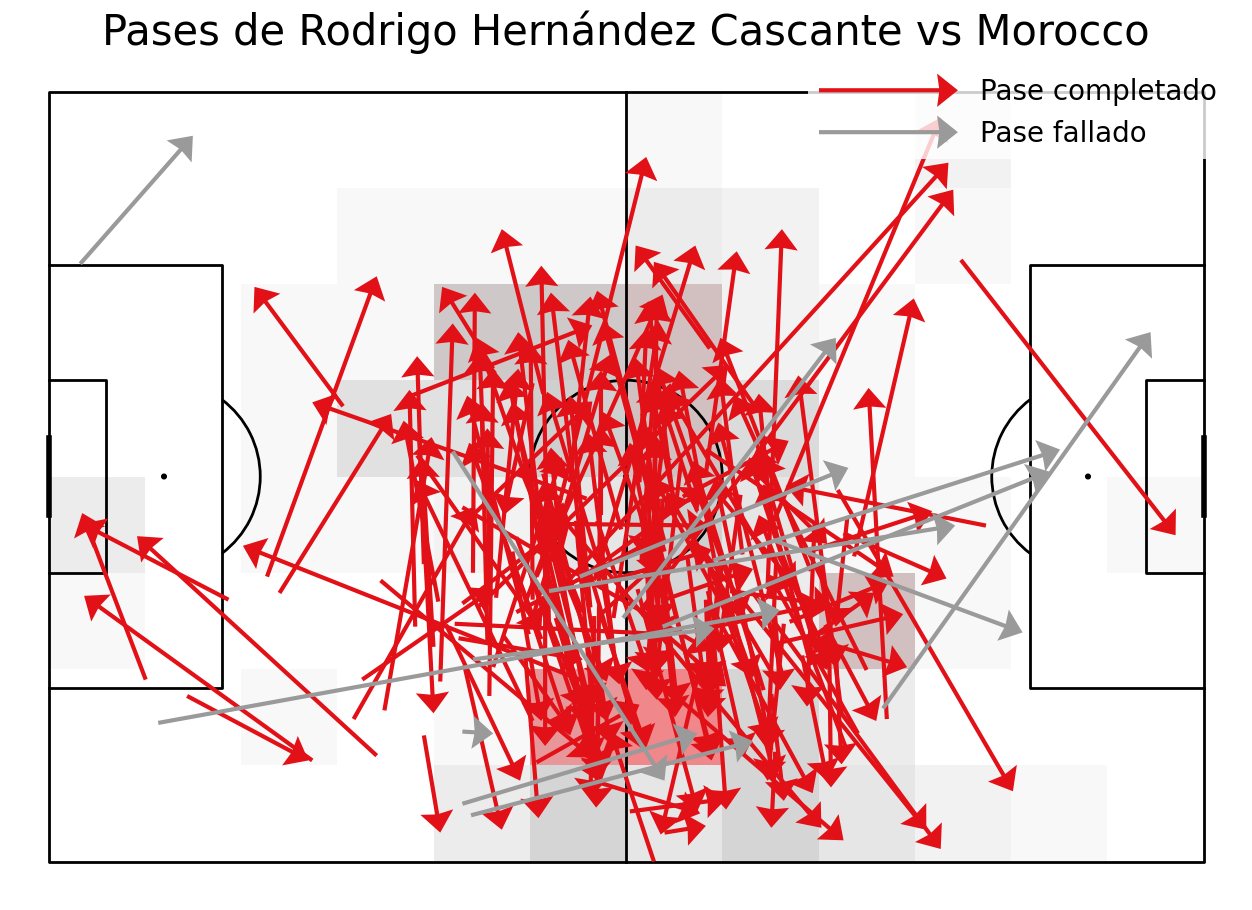

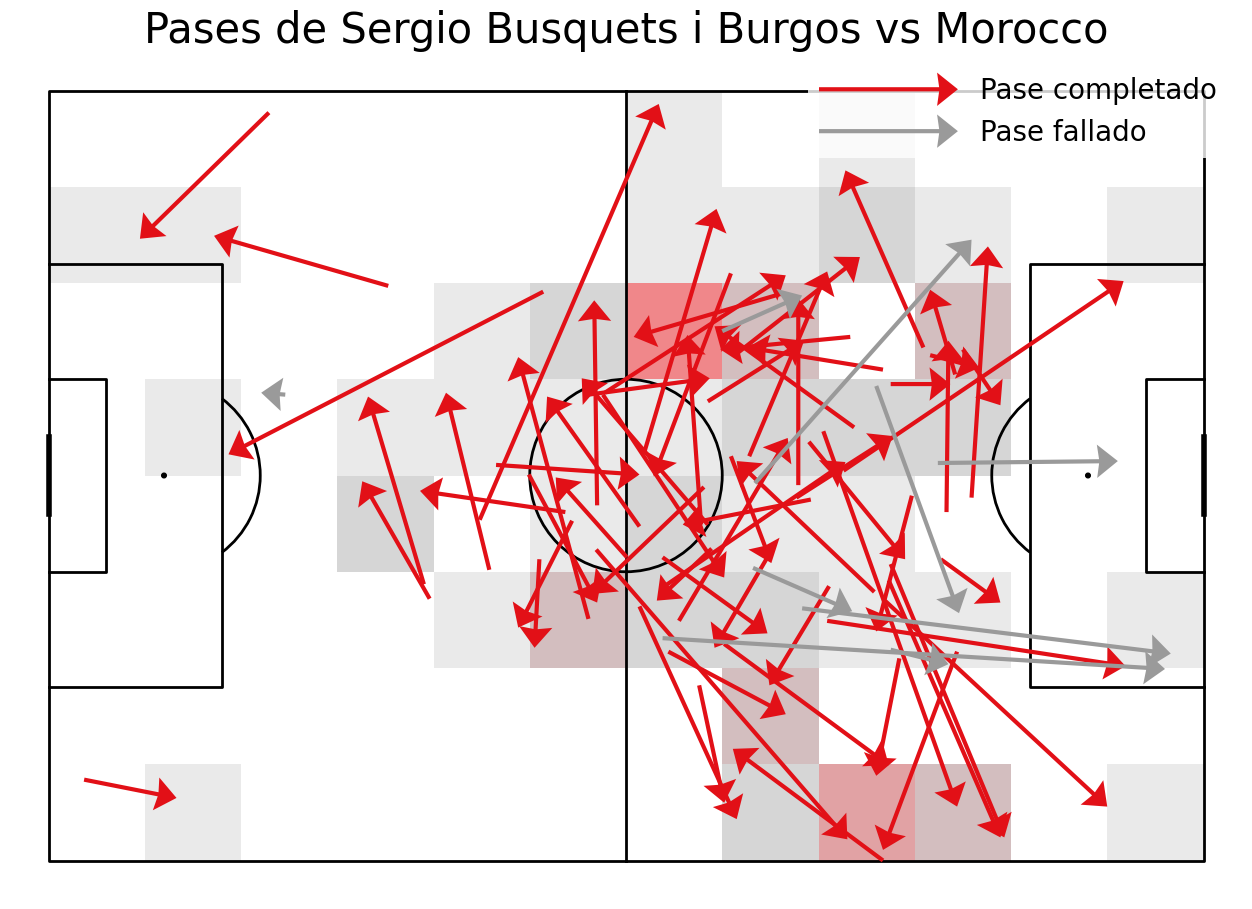

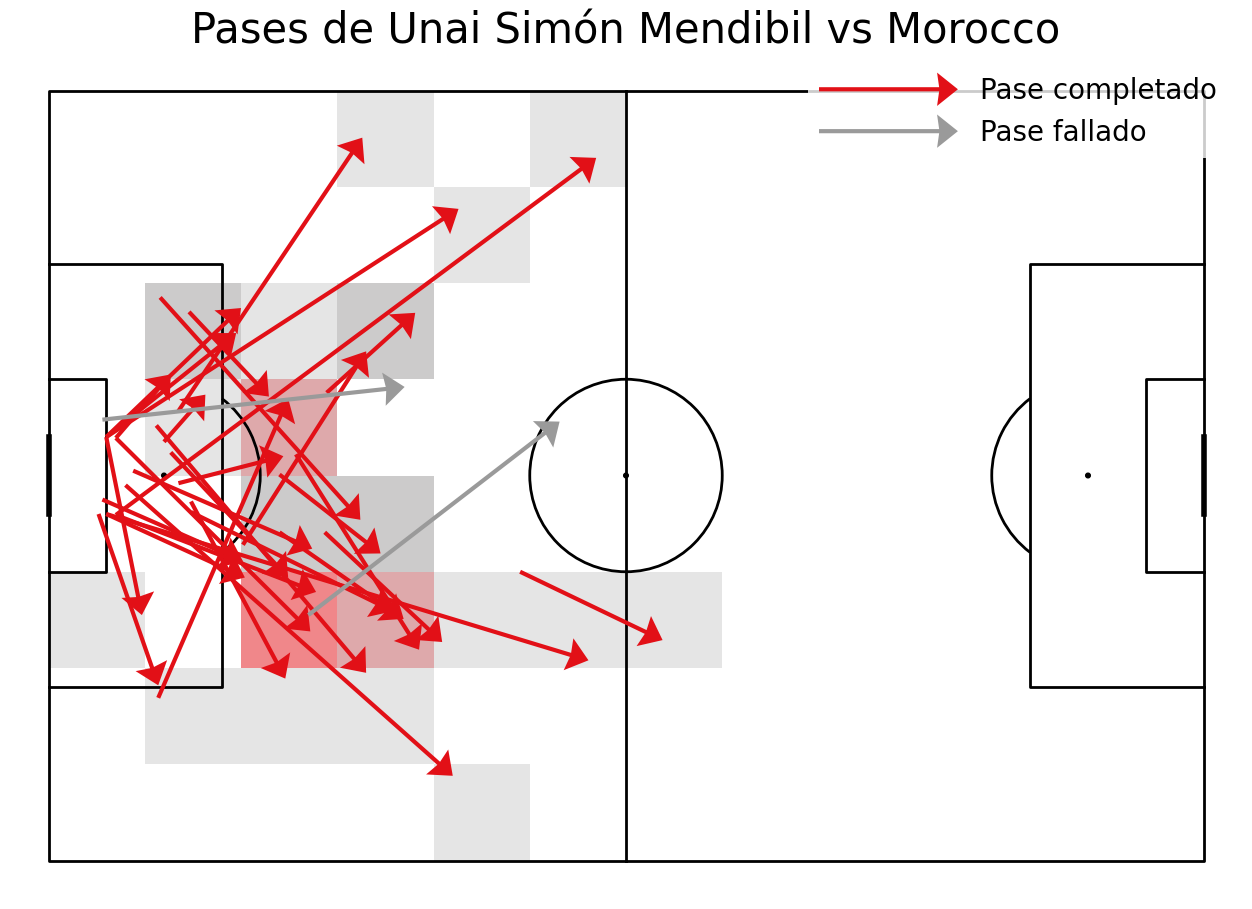

In [160]:
# Representación de los pases completos e incompletos
for player in pases_totales['player'].unique():
    passMap(player)

- #### Posesión del balón

In [161]:
team1_team2

ball_receipt_outcome ball_recovery_recovery_failure block_deflection  \
0                     NaN                            NaN              NaN   
1                     NaN                            NaN              NaN   
2                     NaN                            NaN              NaN   
3                     NaN                            NaN              NaN   
4                     NaN                            NaN              NaN   
...                   ...                            ...              ...   
4745                  NaN                            NaN              NaN   
4746                  NaN                            NaN              NaN   
4747                  NaN                            NaN              NaN   
4748                  NaN                            NaN              NaN   
4749                  NaN                            NaN              NaN   

     carry_end_location clearance_aerial_won clearance_body_part  \
0                   NaN                  NaN                 NaN   
1                   NaN                  NaN                 NaN   
2                   NaN                  NaN                 NaN   
3                   NaN                  NaN                 NaN   
4                   NaN                  NaN                 NaN   
...                 ...                  ...                 ...   
4745                NaN                  NaN                 NaN   
4746                NaN                  NaN                 NaN   
4747                NaN                  NaN                 NaN   
4748                NaN                  NaN                 NaN   
4749                NaN                  NaN                 NaN   

     clearance_head clearance_left_foot clearance_right_foot counterpress  \
0               NaN                 NaN                  NaN          NaN   
1               NaN                 NaN                  NaN          NaN   
2               NaN                 NaN                  NaN          NaN   
3               NaN                 NaN                  NaN          NaN   
4               NaN                 NaN                  NaN          NaN   
...             ...                 ...                  ...          ...   
4745            NaN                 NaN                  NaN          NaN   
4746            NaN                 NaN                  NaN          NaN   
4747            NaN                 NaN                  NaN          NaN   
4748            NaN                 NaN                  NaN          NaN   
4749            NaN                 NaN                  NaN          NaN   

     dribble_nutmeg dribble_outcome dribble_overrun duel_outcome duel_type  \
0               NaN             NaN             NaN          NaN       NaN   
1               NaN             NaN             NaN          NaN       NaN   
2               NaN             NaN             NaN          NaN       NaN   
3               NaN             NaN             NaN          NaN       NaN   
4               NaN             NaN             NaN          NaN       NaN   
...             ...             ...             ...          ...       ...   
4745            NaN             NaN             NaN          NaN       NaN   
4746            NaN             NaN             NaN          NaN       NaN   
4747            NaN             NaN             NaN          NaN       NaN   
4748            NaN             NaN             NaN          NaN       NaN   
4749            NaN             NaN             NaN          NaN       NaN   

      duration foul_committed_advantage foul_committed_card  \
0          0.0                      NaN                 NaN   
1          0.0                      NaN                 NaN   
2          0.0                      NaN                 NaN   
3          0.0                      NaN                 NaN   
4          0.0                      NaN                 NaN   
...        ...         

In [162]:
#Creamos un datset únicamente con los eventos tipo “Carry” para determinar nuestro objetivo de posesión
team1_team2['type'].unique()
posesion = team1_team2[team1_team2['type']=='Carry']

In [163]:
posesion

ball_receipt_outcome ball_recovery_recovery_failure block_deflection  \
2734                  NaN                            NaN              NaN   
2735                  NaN                            NaN              NaN   
2736                  NaN                            NaN              NaN   
2737                  NaN                            NaN              NaN   
2738                  NaN                            NaN              NaN   
...                   ...                            ...              ...   
3838                  NaN                            NaN              NaN   
3839                  NaN                            NaN              NaN   
3840                  NaN                            NaN              NaN   
3841                  NaN                            NaN              NaN   
3842                  NaN                            NaN              NaN   

     carry_end_location clearance_aerial_won clearance_body_part  \
2734       [41.6, 33.3]                  NaN                 NaN   
2735       [61.4, 54.1]                  NaN                 NaN   
2736        [89.3, 9.8]                  NaN                 NaN   
2737        [76.0, 5.5]                  NaN                 NaN   
2738       [61.4, 40.6]                  NaN                 NaN   
...                 ...                  ...                 ...   
3838       [74.7, 47.6]                  NaN                 NaN   
3839       [79.4, 55.3]                  NaN                 NaN   
3840       [93.3, 43.8]                  NaN                 NaN   
3841       [92.9, 28.4]                  NaN                 NaN   
3842       [94.8, 17.5]                  NaN                 NaN   

     clearance_head clearance_left_foot clearance_right_foot counterpress  \
2734            NaN                 NaN                  NaN          NaN   
2735            NaN                 NaN                  NaN          NaN   
2736            NaN                 NaN                  NaN          NaN   
2737            NaN                 NaN                  NaN          NaN   
2738            NaN                 NaN                  NaN          NaN   
...             ...                 ...                  ...          ...   
3838            NaN                 NaN                  NaN          NaN   
3839            NaN                 NaN                  NaN          NaN   
3840            NaN                 NaN                  NaN          NaN   
3841            NaN                 NaN                  NaN          NaN   
3842            NaN                 NaN                  NaN          NaN   

     dribble_nutmeg dribble_outcome dribble_overrun duel_outcome duel_type  \
2734            NaN             NaN             NaN          NaN       NaN   
2735            NaN             NaN             NaN          NaN       NaN   
2736            NaN             NaN             NaN          NaN       NaN   
2737            NaN             NaN             NaN          NaN       NaN   
2738            NaN             NaN             NaN          NaN       NaN   
...             ...             ...             ...          ...       ...   
3838            NaN             NaN             NaN          NaN       NaN   
3839            NaN             NaN             NaN          NaN       NaN   
3840            NaN             NaN             NaN          NaN       NaN   
3841            NaN             NaN             NaN          NaN       NaN   
3842            NaN             NaN             NaN          NaN       NaN   

      duration foul_committed_advantage foul_committed_card  \
2734  3.193788                      NaN                 NaN   
2735  2.843027                      NaN                 NaN   
2736  0.832681                      NaN                 NaN   
2737  0.864871                      NaN                 NaN   
2738  3.096784                      NaN                 NaN   
...        ...         

In [164]:
# Agrupar por equipo y sumar el tiempo de posesión
posesion_por_equipo = posesion.groupby('team')['duration'].sum()

# Calcular el total del tiempo de posesión en el partido
total_posesion = posesion['duration'].sum()

# Calcular el porcentaje de posesión para cada equipo
porcentaje_posesion_por_equipo = (posesion_por_equipo / total_posesion) * 100

print(porcentaje_posesion_por_equipo)


team
Morocco    21.147632
Spain      78.852368
Name: duration, dtype: float64


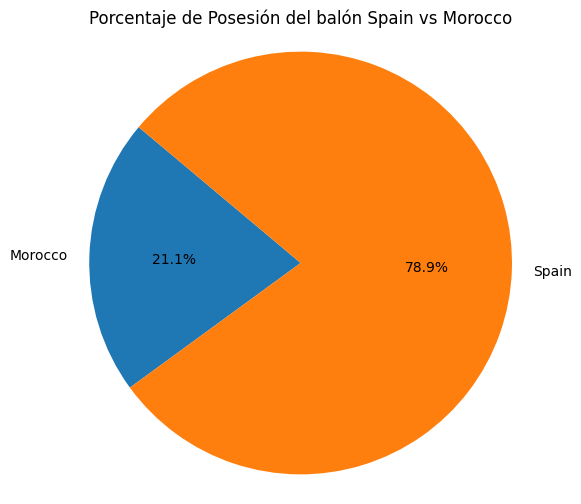

In [165]:
# Crear un gráfico de pastel de procentaje de la posesión del balón
plt.figure(figsize=(6,6 ))
plt.pie(porcentaje_posesion_por_equipo, labels=porcentaje_posesion_por_equipo.index, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de Posesión del balón ' + Team1 +' vs ' + Team2)
plt.axis('equal')  

plt.show()

In [179]:
posesion_team1 = posesion[(posesion["team"]== Team1)]
posesion_team2 = posesion[(posesion["team"]== Team2)]
posesion_team1

ball_receipt_outcome ball_recovery_recovery_failure block_deflection  \
2734                  NaN                            NaN              NaN   
2735                  NaN                            NaN              NaN   
2736                  NaN                            NaN              NaN   
2737                  NaN                            NaN              NaN   
2738                  NaN                            NaN              NaN   
...                   ...                            ...              ...   
3838                  NaN                            NaN              NaN   
3839                  NaN                            NaN              NaN   
3840                  NaN                            NaN              NaN   
3841                  NaN                            NaN              NaN   
3842                  NaN                            NaN              NaN   

     carry_end_location clearance_aerial_won clearance_body_part  \
2734       [41.6, 33.3]                  NaN                 NaN   
2735       [61.4, 54.1]                  NaN                 NaN   
2736        [89.3, 9.8]                  NaN                 NaN   
2737        [76.0, 5.5]                  NaN                 NaN   
2738       [61.4, 40.6]                  NaN                 NaN   
...                 ...                  ...                 ...   
3838       [74.7, 47.6]                  NaN                 NaN   
3839       [79.4, 55.3]                  NaN                 NaN   
3840       [93.3, 43.8]                  NaN                 NaN   
3841       [92.9, 28.4]                  NaN                 NaN   
3842       [94.8, 17.5]                  NaN                 NaN   

     clearance_head clearance_left_foot clearance_right_foot counterpress  \
2734            NaN                 NaN                  NaN          NaN   
2735            NaN                 NaN                  NaN          NaN   
2736            NaN                 NaN                  NaN          NaN   
2737            NaN                 NaN                  NaN          NaN   
2738            NaN                 NaN                  NaN          NaN   
...             ...                 ...                  ...          ...   
3838            NaN                 NaN                  NaN          NaN   
3839            NaN                 NaN                  NaN          NaN   
3840            NaN                 NaN                  NaN          NaN   
3841            NaN                 NaN                  NaN          NaN   
3842            NaN                 NaN                  NaN          NaN   

     dribble_nutmeg dribble_outcome dribble_overrun duel_outcome duel_type  \
2734            NaN             NaN             NaN          NaN       NaN   
2735            NaN             NaN             NaN          NaN       NaN   
2736            NaN             NaN             NaN          NaN       NaN   
2737            NaN             NaN             NaN          NaN       NaN   
2738            NaN             NaN             NaN          NaN       NaN   
...             ...             ...             ...          ...       ...   
3838            NaN             NaN             NaN          NaN       NaN   
3839            NaN             NaN             NaN          NaN       NaN   
3840            NaN             NaN             NaN          NaN       NaN   
3841            NaN             NaN             NaN          NaN       NaN   
3842            NaN             NaN             NaN          NaN       NaN   

      duration foul_committed_advantage foul_committed_card  \
2734  3.193788                      NaN                 NaN   
2735  2.843027                      NaN                 NaN   
2736  0.832681                      NaN                 NaN   
2737  0.864871                      NaN                 NaN   
2738  3.096784                      NaN                 NaN   
...        ...         

In [180]:
posesion_team1['player'].unique()

array(['Aymeric Laporte', 'Rodrigo Hernández Cascante',
       'Daniel Olmo Carvajal', 'Jordi Alba Ramos',
       'Marcos Llorente Moreno', 'Pedro González López',
       'Ferrán Torres García', 'Pablo Martín Páez Gavira',
       'Marco Asensio Willemsen', 'Sergio Busquets i Burgos',
       'Unai Simón Mendibil', 'Carlos Soler Barragán',
       'Álvaro Borja Morata Martín', 'Nicholas Williams Arthuer',
       'Alejandro Balde Martínez', 'Anssumane Fati',
       'Pablo Sarabia García'], dtype=object)

In [181]:

# Agrupar por jugador y sumar el tiempo de posesión
posesion_por_jugador = posesion_team1.groupby('player')['duration'].sum()

# Calcular el total del tiempo de posesión en el partido
total_posesion = posesion_team1['duration'].sum()

# Calcular el porcentaje de posesión para cada jugador
porcentaje_posesion_por_jugador = (posesion_por_jugador / total_posesion) * 100

print(porcentaje_posesion_por_jugador)



player
Alejandro Balde Martínez       1.369533
Anssumane Fati                 0.746258
Aymeric Laporte               20.298175
Carlos Soler Barragán          3.179983
Daniel Olmo Carvajal           3.745084
Ferrán Torres García           3.077122
Jordi Alba Ramos               8.763061
Marco Asensio Willemsen        0.894240
Marcos Llorente Moreno         7.250146
Nicholas Williams Arthuer      2.949712
Pablo Martín Páez Gavira       1.545777
Pablo Sarabia García           0.161305
Pedro González López          13.993412
Rodrigo Hernández Cascante    24.876467
Sergio Busquets i Burgos       4.440674
Unai Simón Mendibil            1.585837
Álvaro Borja Morata Martín     1.123214
Name: duration, dtype: float64


In [182]:
import pandas as pd

# Agrupar por jugador y sumar el tiempo de posesión
posesion_por_jugador = posesion_team1.groupby('player')['duration'].sum()

# Calcular el total del tiempo de posesión en el partido
total_posesion = posesion_team1['duration'].sum()

# Calcular el porcentaje de posesión para cada jugador
porcentaje_posesion_por_jugador = (posesion_por_jugador / total_posesion) * 100

# Crear un DataFrame a partir de la Serie porcentaje_posesion_por_jugador
df_resultado = pd.DataFrame({'Jugador': porcentaje_posesion_por_jugador.index, 'Porcentaje %': porcentaje_posesion_por_jugador.values})

# Agregar un título al DataFrame
porcentaje_posesion_por_jugador = df_resultado.rename(columns={'Jugador': 'Player', 'Porcentaje %': 'Porcentaje %'})

# Imprimir el DataFrame con el título
print(porcentaje_posesion_por_jugador)


                        Player  Porcentaje %
0     Alejandro Balde Martínez      1.369533
1               Anssumane Fati      0.746258
2              Aymeric Laporte     20.298175
3        Carlos Soler Barragán      3.179983
4         Daniel Olmo Carvajal      3.745084
5         Ferrán Torres García      3.077122
6             Jordi Alba Ramos      8.763061
7      Marco Asensio Willemsen      0.894240
8       Marcos Llorente Moreno      7.250146
9    Nicholas Williams Arthuer      2.949712
10    Pablo Martín Páez Gavira      1.545777
11        Pablo Sarabia García      0.161305
12        Pedro González López     13.993412
13  Rodrigo Hernández Cascante     24.876467
14    Sergio Busquets i Burgos      4.440674
15         Unai Simón Mendibil      1.585837
16  Álvaro Borja Morata Martín      1.123214


In [183]:
#Puedes crear una tabla de top 10 jugadores por separado y usar esto en el codigo de la grafica
top_10_porcentaje_P = porcentaje_posesion_por_jugador.sort_values('Porcentaje %', ascending = True).tail(10)

top_10_porcentaje_P

#puedes intentar con .head(10) y se invertira el orden


Player  Porcentaje %
9    Nicholas Williams Arthuer      2.949712
5         Ferrán Torres García      3.077122
3        Carlos Soler Barragán      3.179983
4         Daniel Olmo Carvajal      3.745084
14    Sergio Busquets i Burgos      4.440674
8       Marcos Llorente Moreno      7.250146
6             Jordi Alba Ramos      8.763061
12        Pedro González López     13.993412
2              Aymeric Laporte     20.298175
13  Rodrigo Hernández Cascante     24.876467

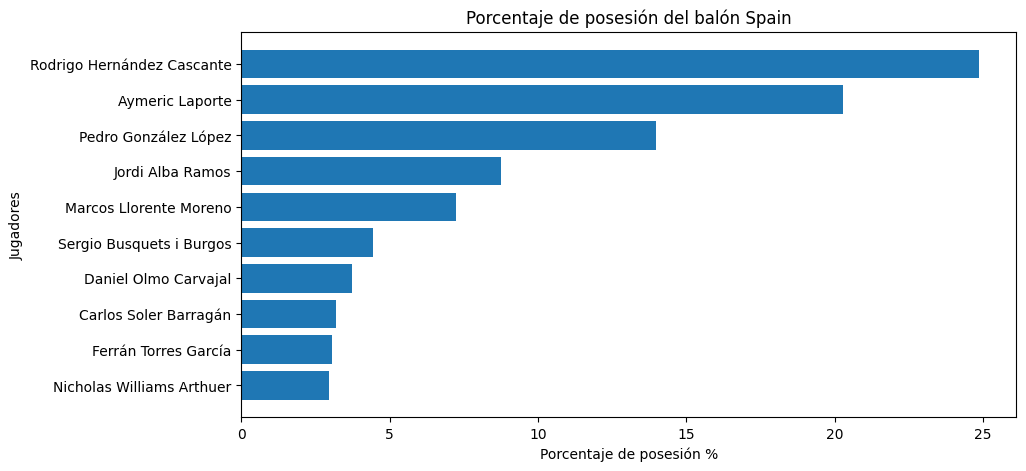

In [184]:
#Graficas de barras
fig = plt.figure(figsize=(10, 5))
ax = plt.axes()
ax.barh(top_10_porcentaje_P['Player'],
       top_10_porcentaje_P['Porcentaje %'])
plt.title("Porcentaje de posesión del balón " + Team1)
plt.xlabel("Porcentaje de posesión %")
plt.ylabel("Jugadores")
plt.show()

# Presentación de los datos de interes

### Porciento de la efectividad de los pases por equipos:

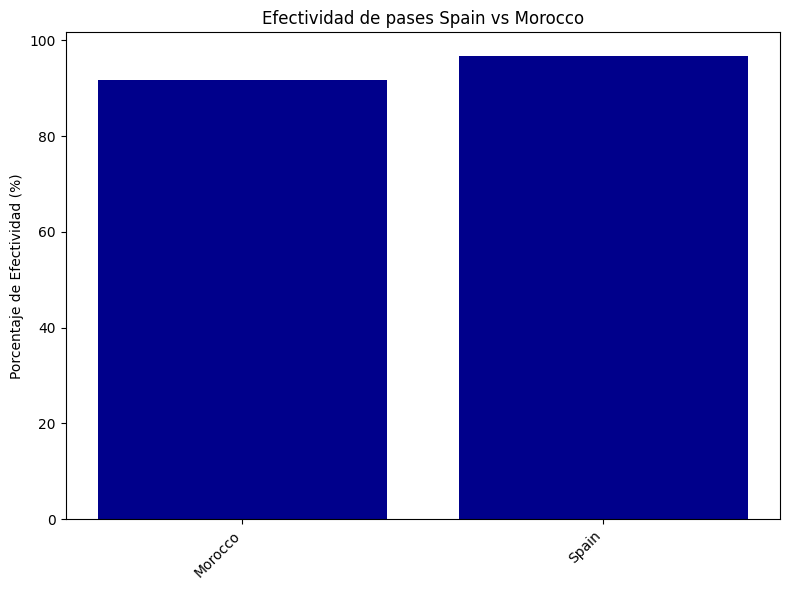

In [172]:
equipos = porcentaje_efectividad_por_equipo.index
porcentajes_efectividad = porcentaje_efectividad_por_equipo.values

# Crear un arreglo de índices para los equipos
indices = np.arange(len(equipos))

# Definir colores personalizados (verde para efectividad positiva, rojo para efectividad negativa)
colores ='darkblue'

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(8, 6))

# Crear las barras para el porcentaje de efectividad
ax.bar(indices, porcentajes_efectividad, color=colores)

# Configurar etiquetas en el eje x
ax.set_xticks(indices)
ax.set_xticklabels(equipos, rotation=45, ha='right')

# Configurar etiquetas y título
plt.ylabel('Porcentaje de Efectividad (%)')

plt.title('Efectividad de pases ' + Team1 + ' vs ' + Team2)

plt.tight_layout()
plt.show()


### Top 10 de lugadores con mejor efectividad en el pase del balón del equipo 1:

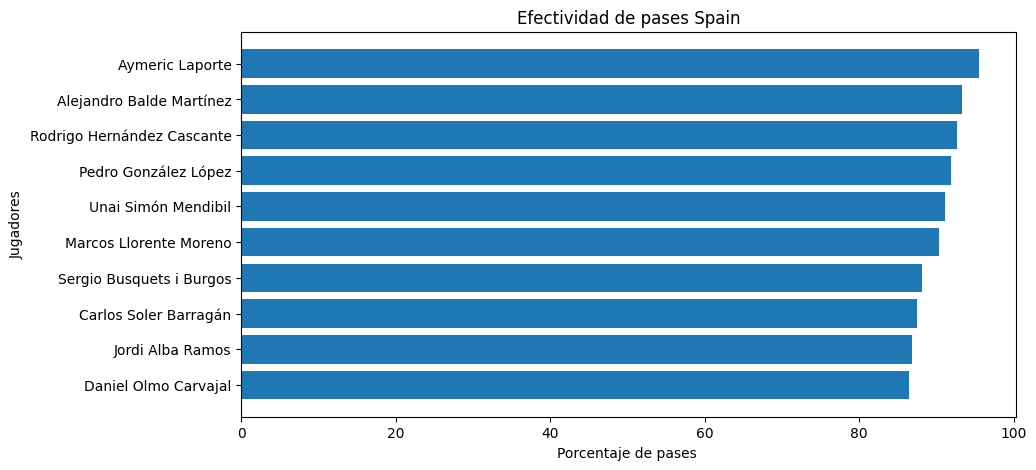

In [173]:
#Graficas de barras
fig = plt.figure(figsize=(10, 5))
ax = plt.axes()
ax.barh(top_10_porcentaje_efectividad['player'],
       top_10_porcentaje_efectividad['Porcentaje %'])
plt.title("Efectividad de pases " + Team1)
plt.xlabel("Porcentaje de pases ")
plt.ylabel("Jugadores")
plt.show()

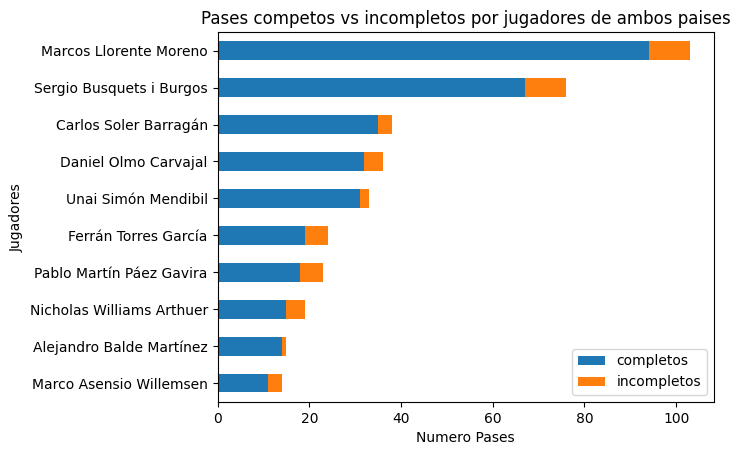

In [174]:
#Graficamos la relacion de los pases compleyado vs los incompletos en un diagrama de barras

ax = pases_totales[['player','completos','incompletos']].sort_values('completos', 
                                 ascending = True).head(10).plot.barh(x='player',stacked=True)
plt.title("Pases competos vs incompletos por jugadores de ambos paises")
plt.xlabel("Numero Pases")
plt.ylabel("Jugadores")
plt.show()

### Presentacion grafica de los realizados del top 10 del equipo 1:

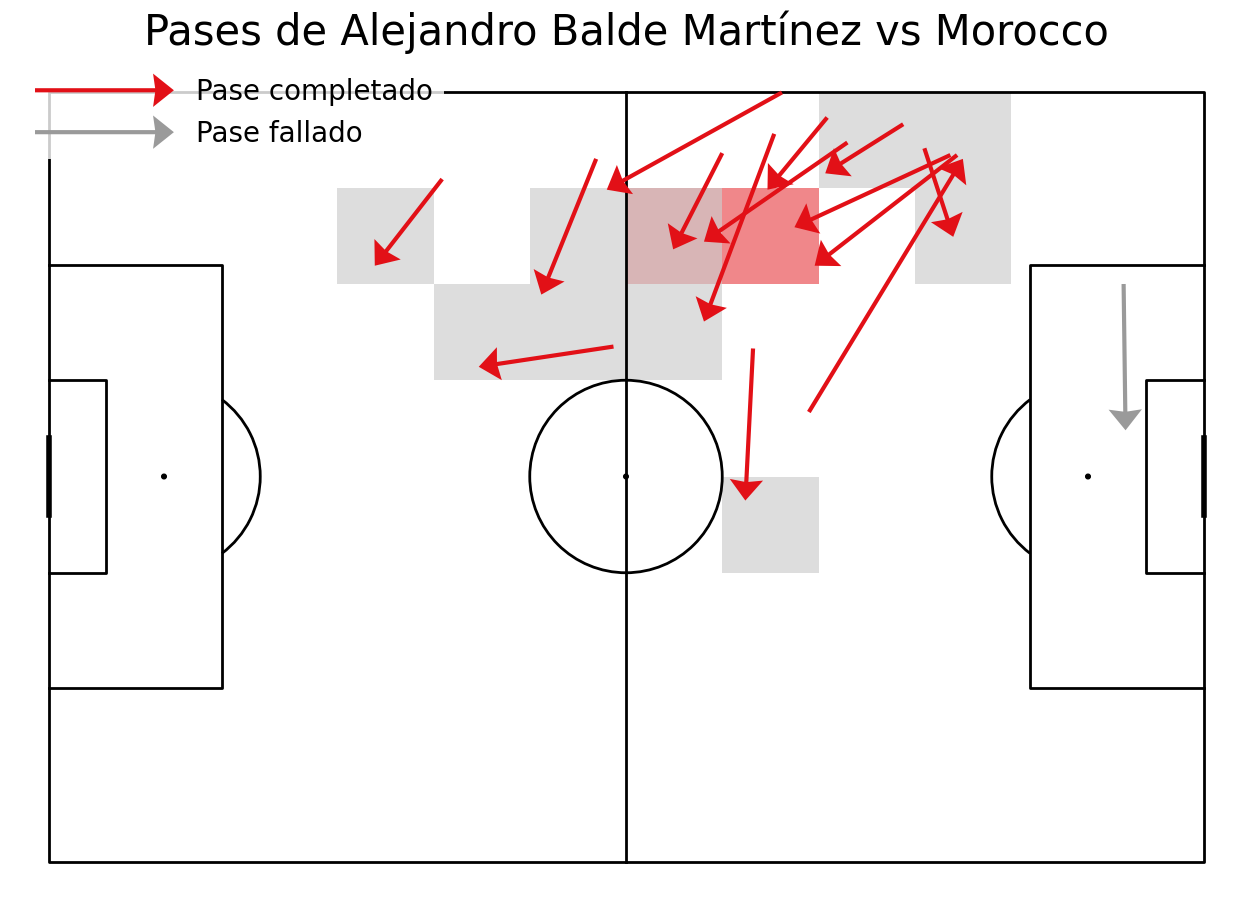

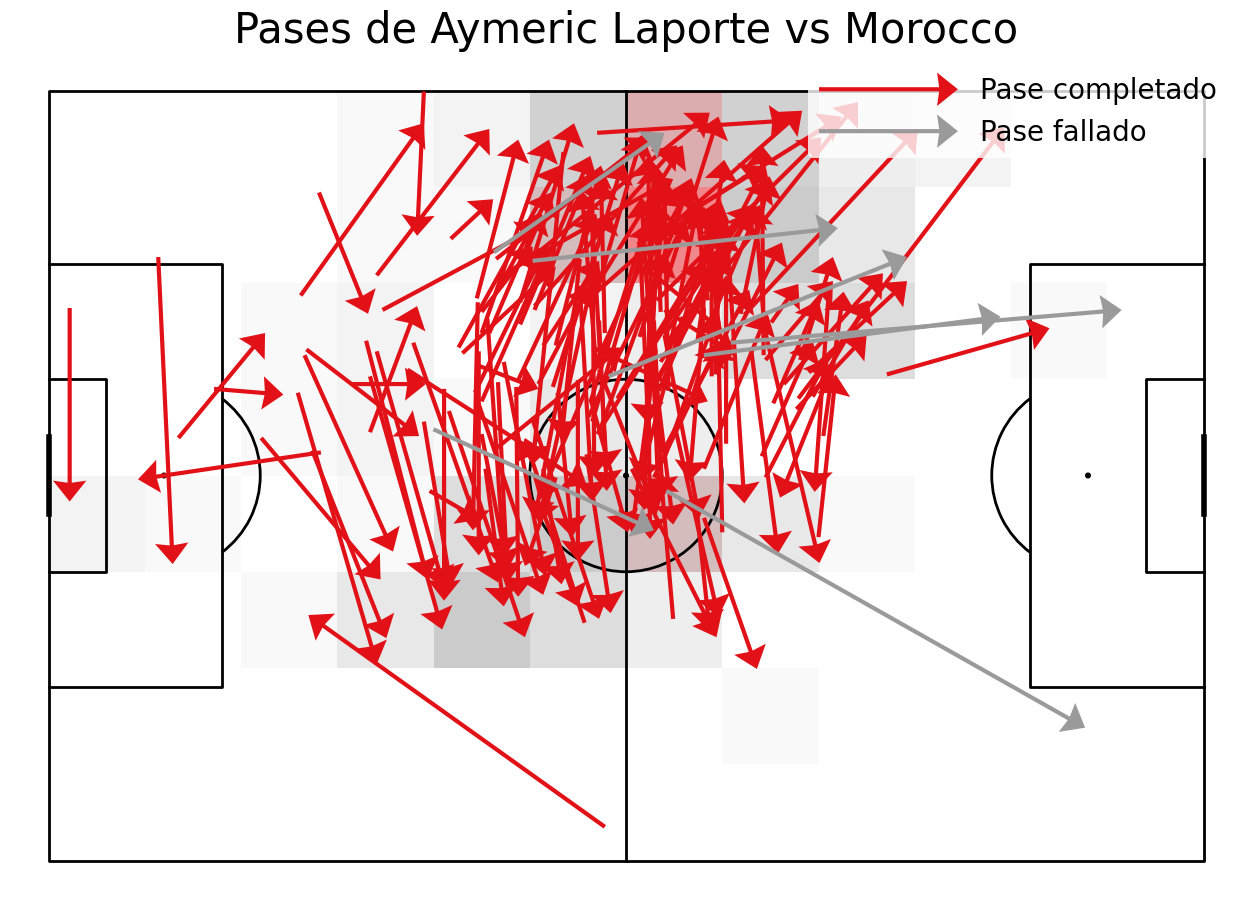

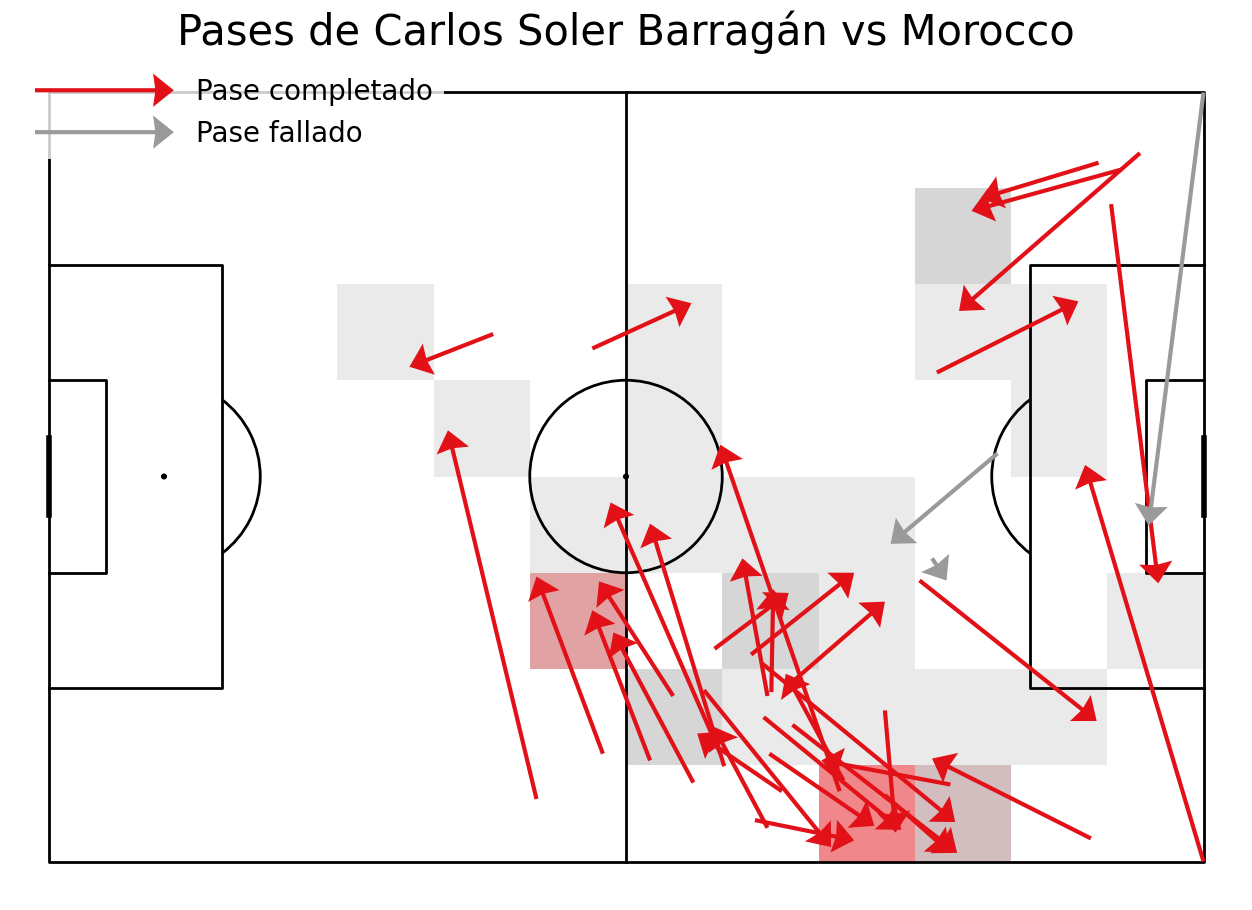

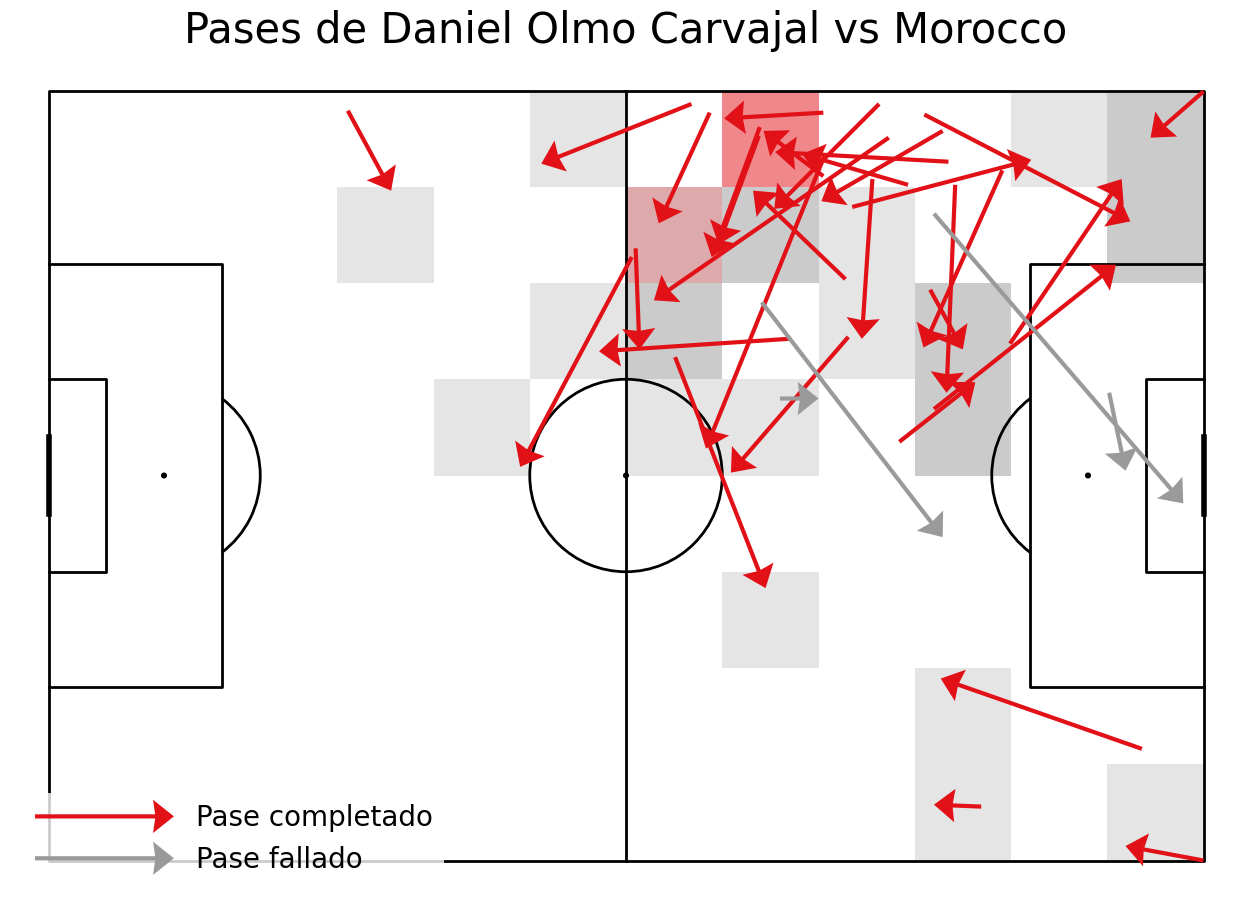

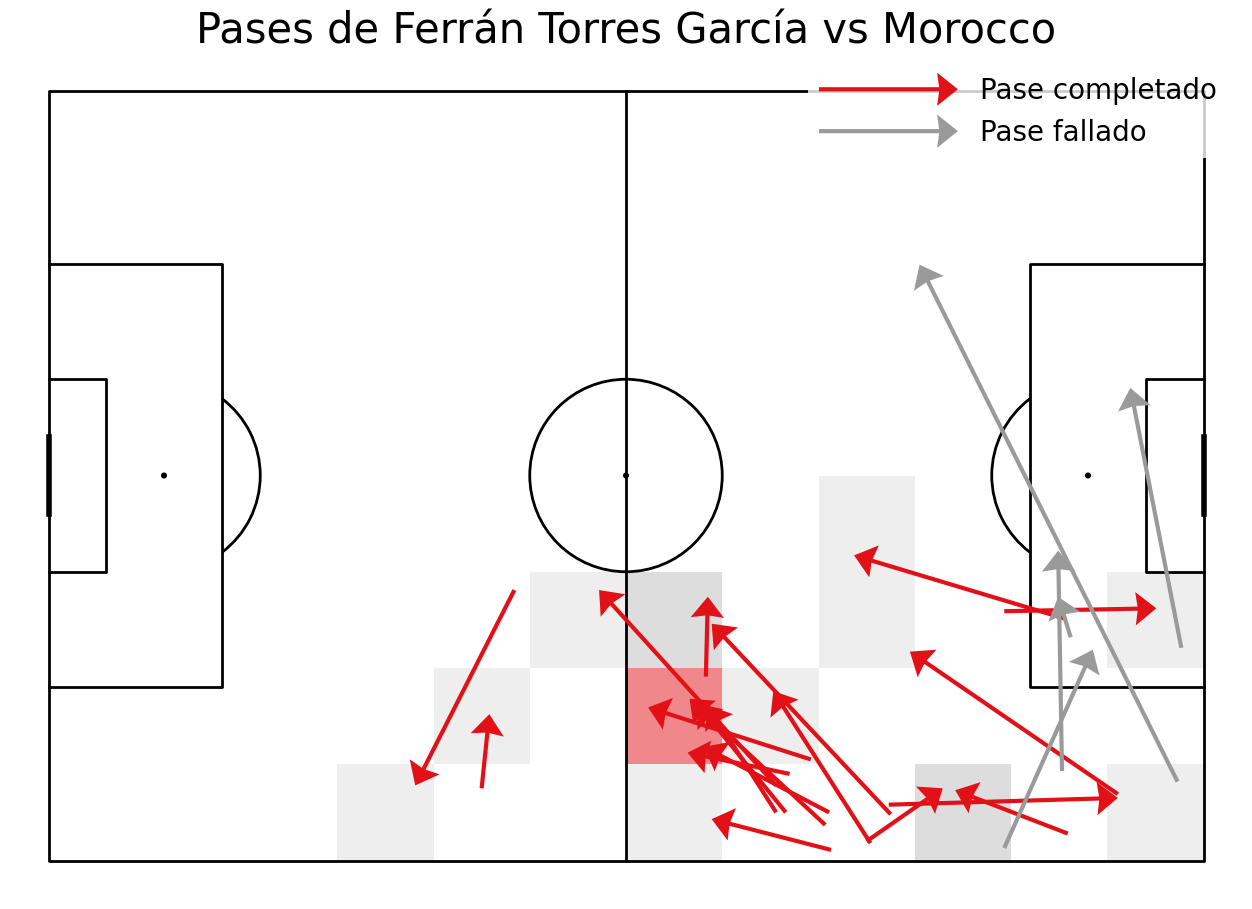

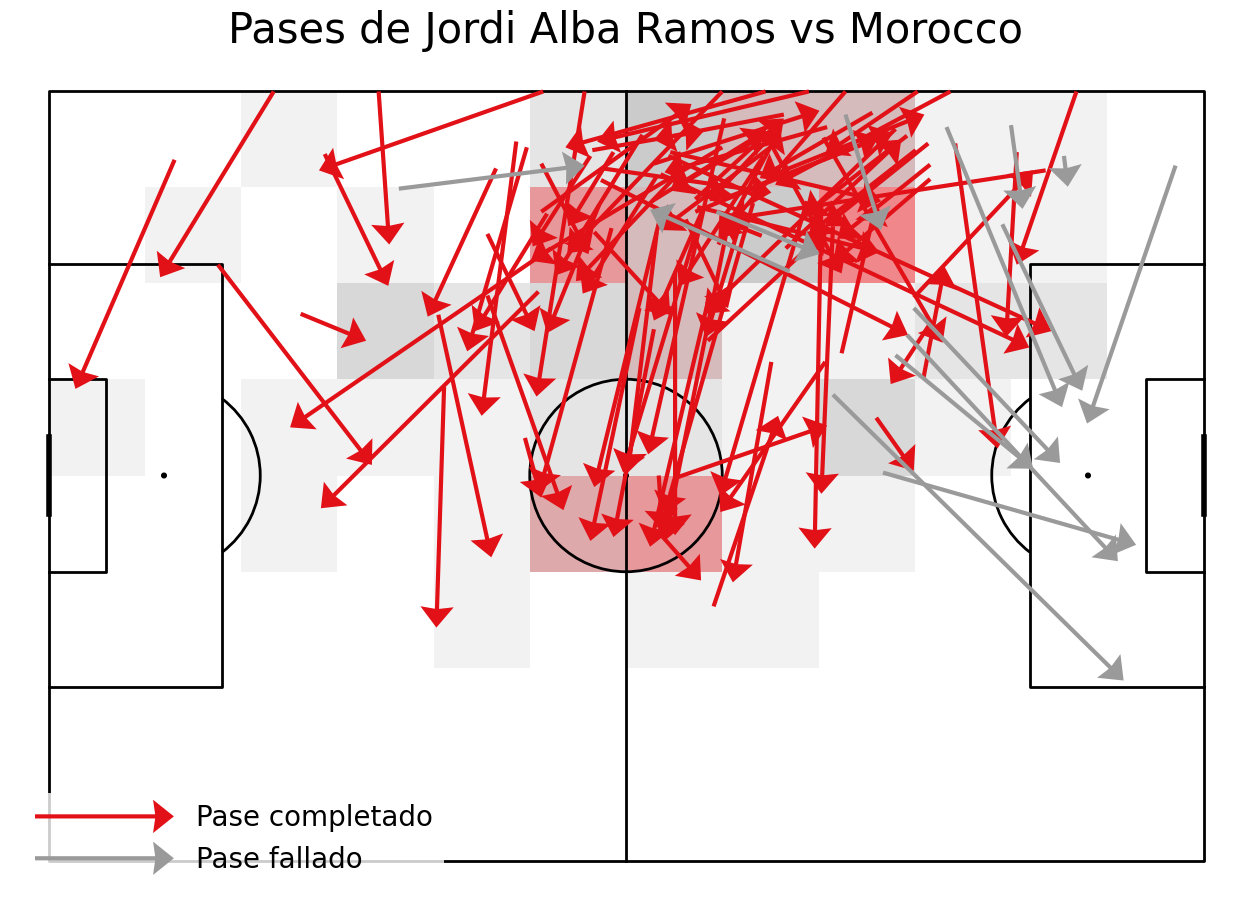

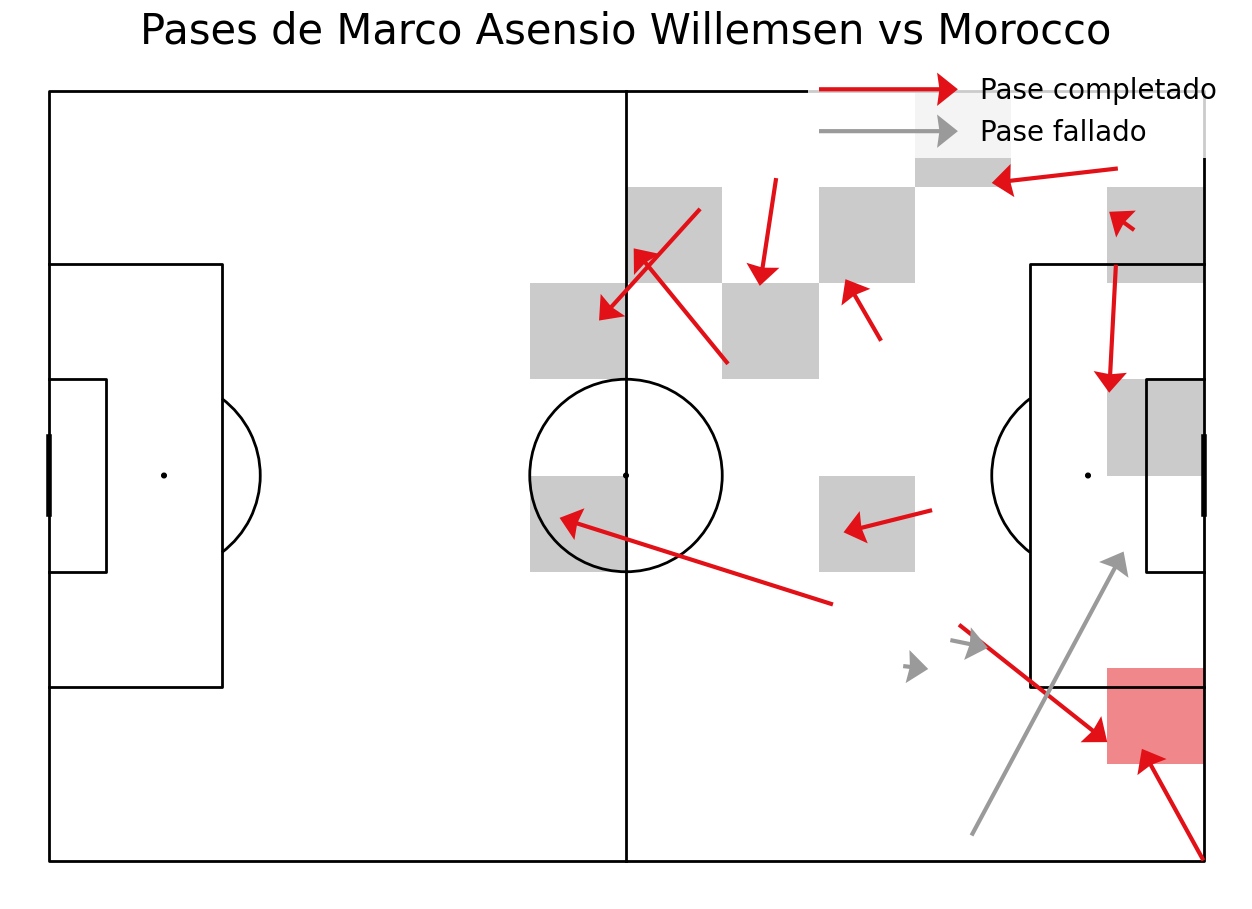

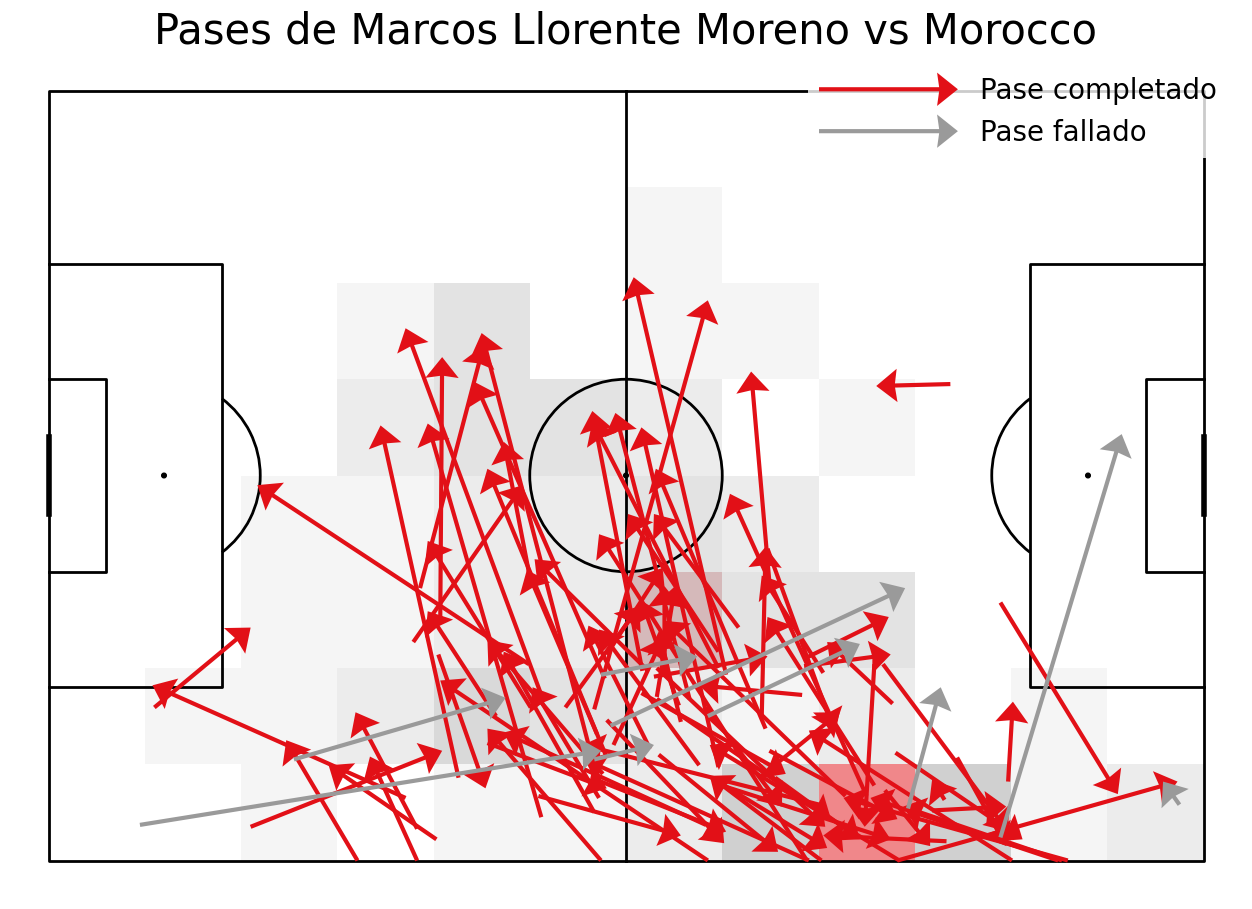

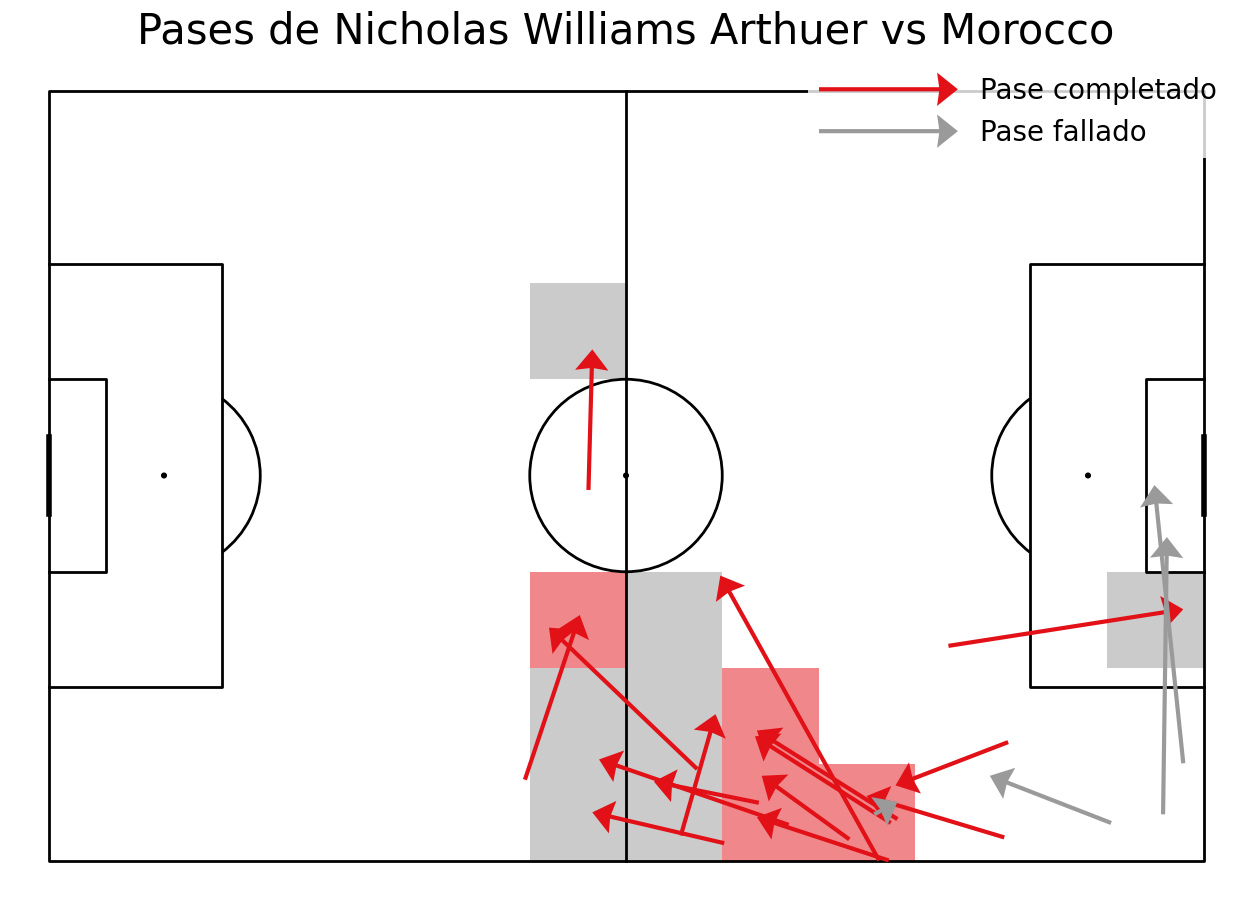

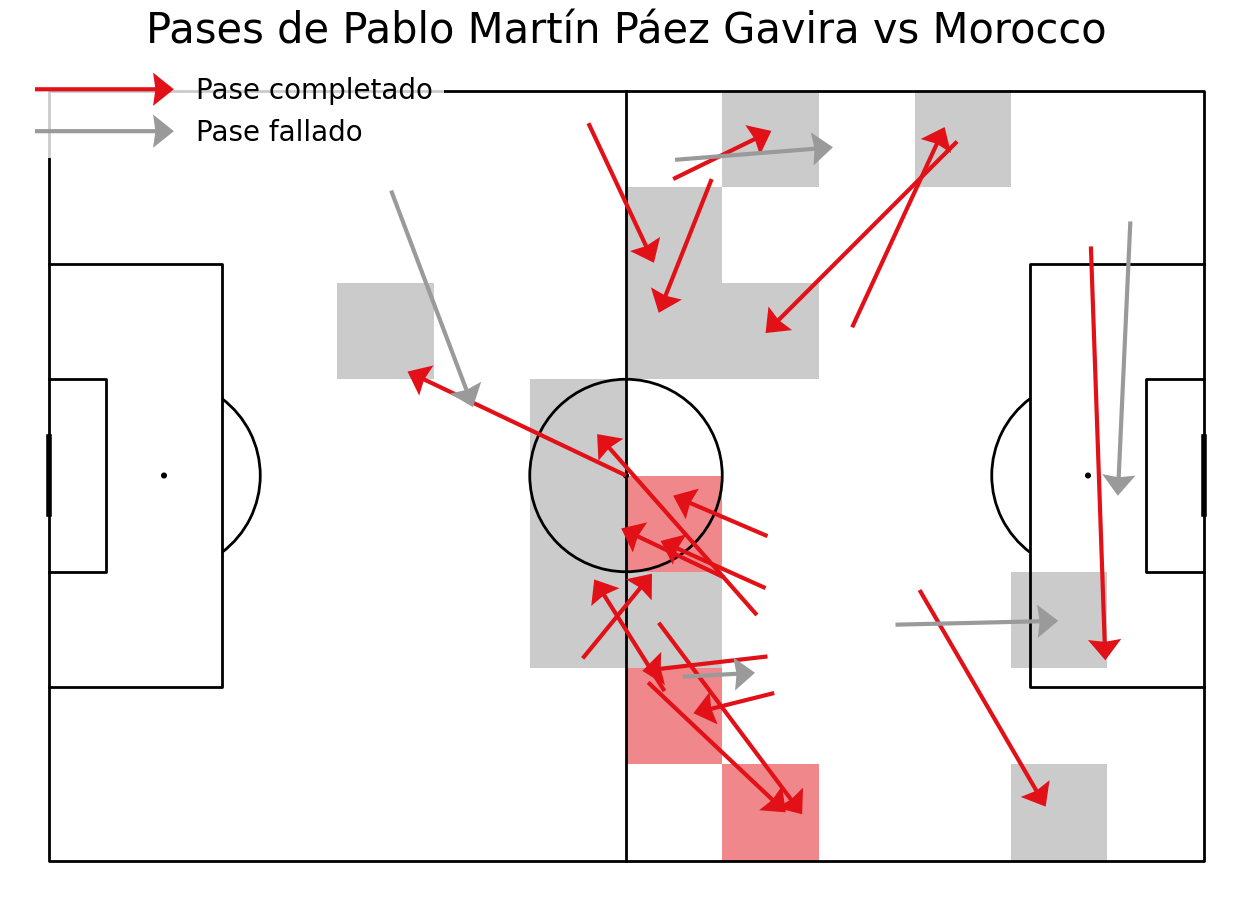

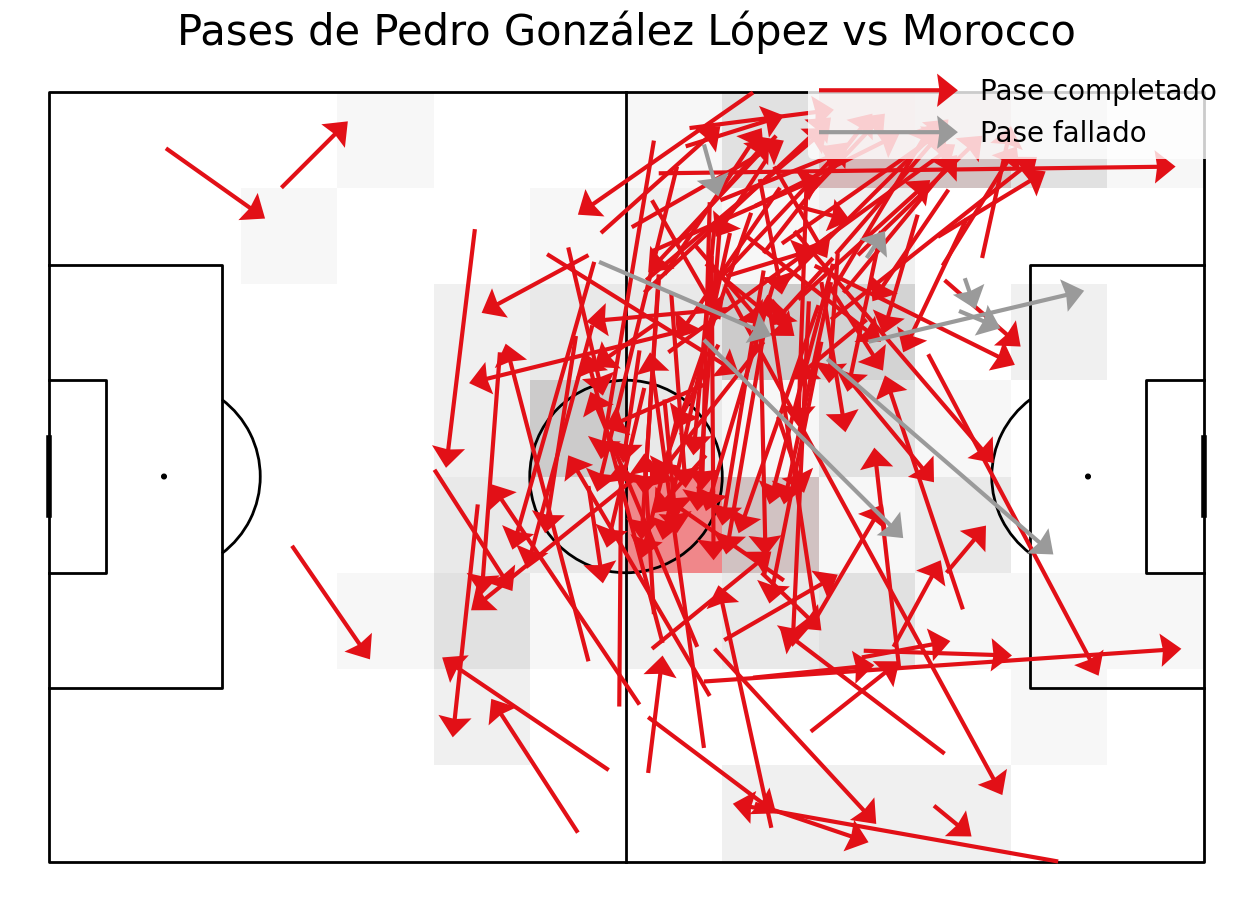

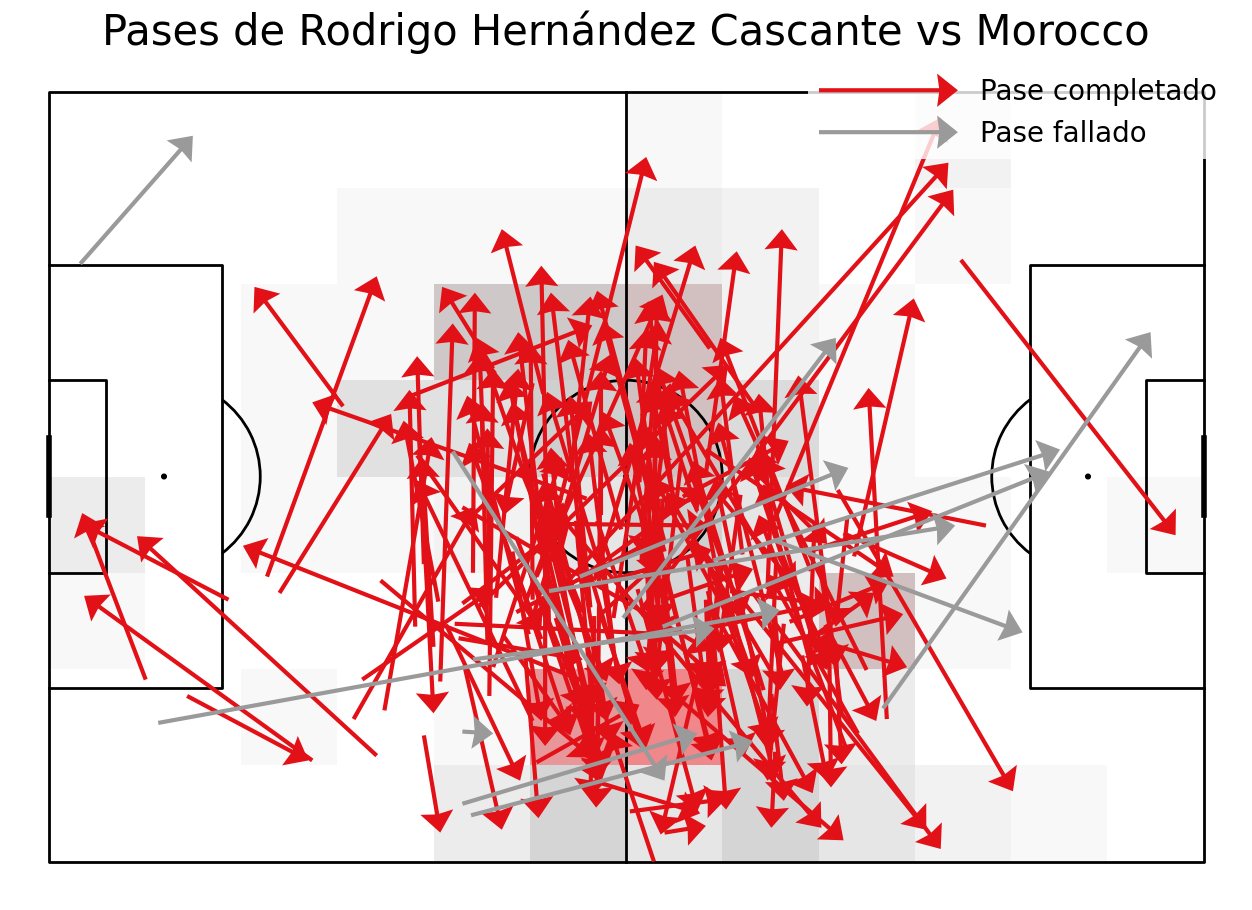

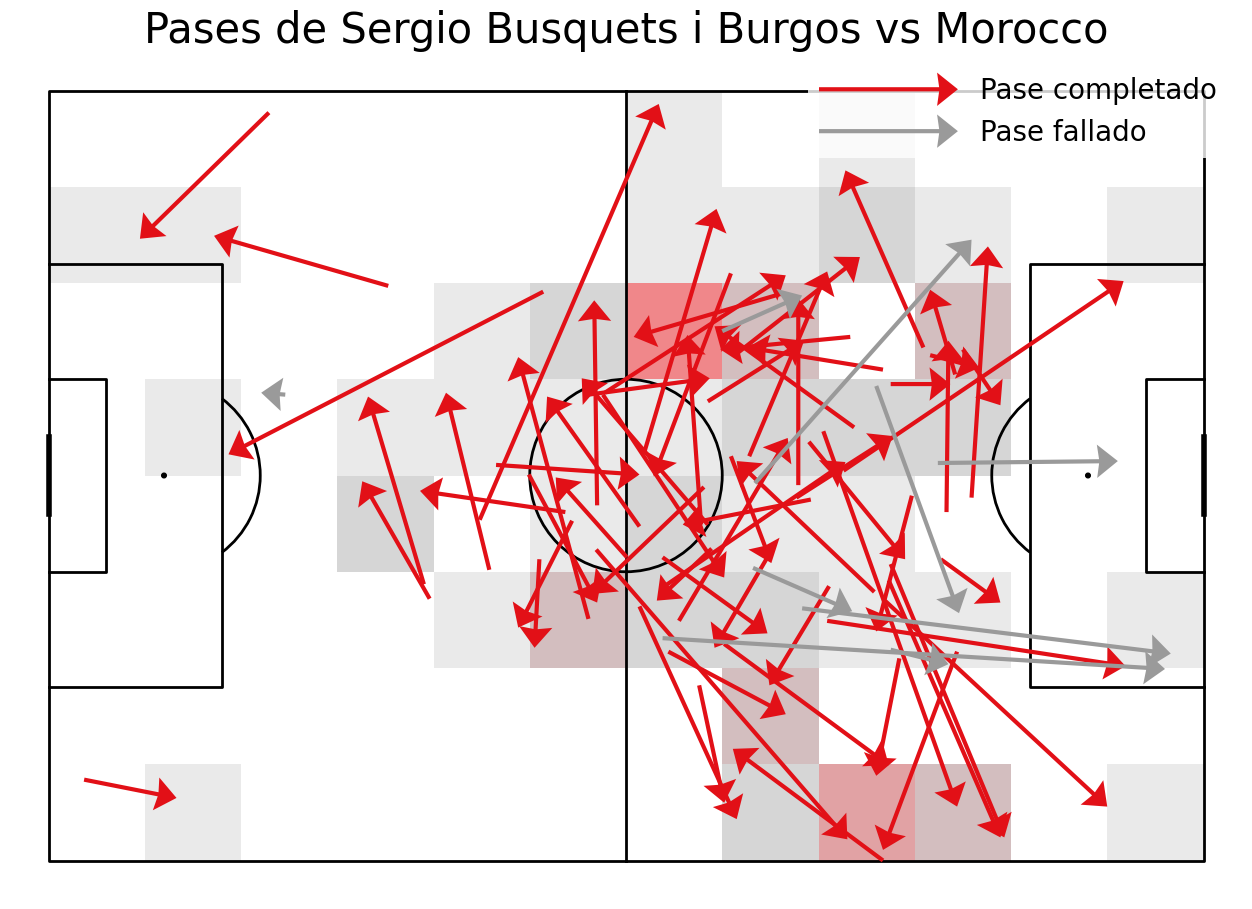

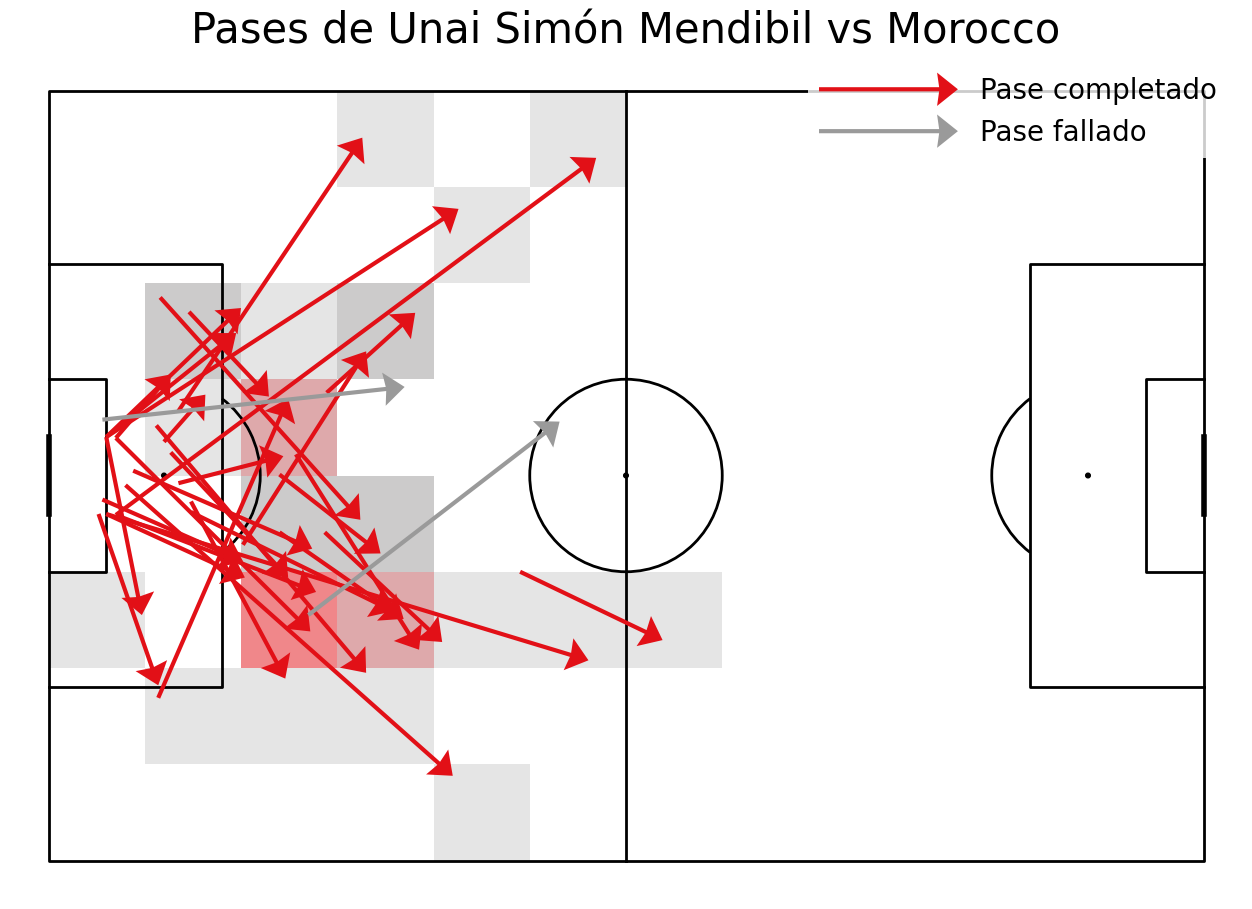

In [175]:
# Representacion de los pases completos e incompletos
for player in pases_totales['player'].unique():
    passMap(player)

### Porcentaje de pocesión del balón:

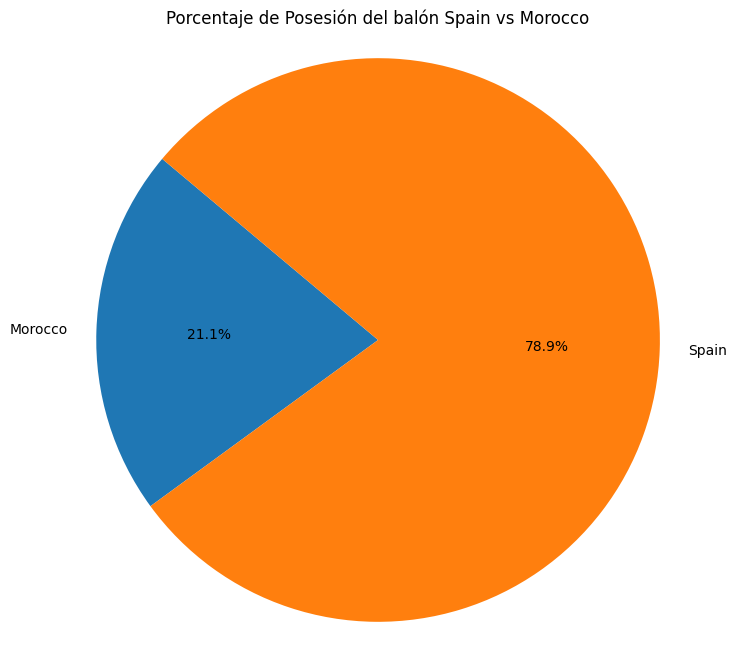

In [176]:
# Crear un gráfico de pastel del procentaje de posesión del balón
plt.figure(figsize=(8, 8))
plt.pie(porcentaje_posesion_por_equipo, labels=porcentaje_posesion_por_equipo.index, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de Posesión del balón ' + Team1 +' vs ' + Team2)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Top 10 de los jugadores con mas posesión del balón del equipo 1: 

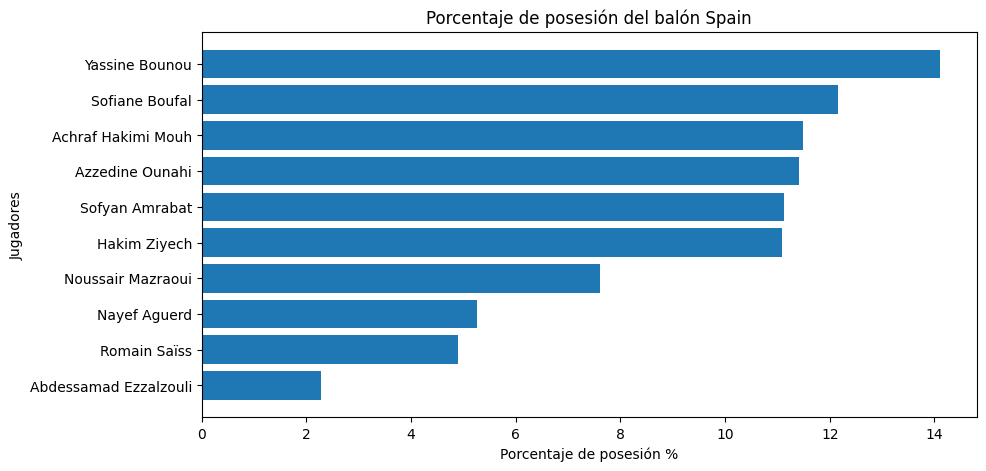

In [177]:
#Graficas de barras del procentaje de posesión del balón

fig = plt.figure(figsize=(10, 5))
ax = plt.axes()
ax.barh(top_10_porcentaje_P['Player'],
       top_10_porcentaje_P['Porcentaje %'])
plt.title("Porcentaje de posesión del balón " + Team1)
plt.xlabel("Porcentaje de posesión %")
plt.ylabel("Jugadores")
plt.show()